# *Prédictions de désabonnement des télécommunications*

La prédiction du « statut du client » parmi trois choix : désabonné, resté et rejoint. Un ensemble de données contenant des informations sur 7043 clients d'une entreprise de télécommunications en Californie a été utilisé. Chaque enregistrement contient des détails sur les données démographiques, l'emplacement, l'ancienneté, les services d'abonnement et plus encore (38 fonctionnalités au total) pour chaque client.




# Importation des librairies et données

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,f1_score, recall_score, precision_score, accuracy_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report, fbeta_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score


In [ ]:
df = pd.read_csv('telecom_customer_churn.csv')
df

Customer ID  Gender  Age Married  Number of Dependents          City  \
0     0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1     0003-MKNFE    Male   46      No                     0      Glendale   
2     0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3     0011-IGKFF    Male   78     Yes                     0      Martinez   
4     0013-EXCHZ  Female   75     Yes                     0     Camarillo   
...          ...     ...  ...     ...                   ...           ...   
7038  9987-LUTYD  Female   20      No                     0       La Mesa   
7039  9992-RRAMN    Male   40     Yes                     0     Riverbank   
7040  9992-UJOEL    Male   22      No                     0           Elk   
7041  9993-LHIEB    Male   21     Yes                     0  Solana Beach   
7042  9995-HOTOH    Male   36     Yes                     0   Sierra City   

      Zip Code   Latitude   Longitude  Number of Referrals  ...  \
0        93225  34.827662 -118.999073                    2  ...   
1        91206  34.162515 -118.203869                    0  ...   
2        92627  33.645672 -117.922613                    0  ...   
3        94553  38.014457 -122.115432                    1  ...   
4        93010  34.227846 -119.079903                    3  ...   
...        ...        ...         ...                  ...  ...   
7038     91941  32.759327 -116.997260                    0  ...   
7039     95367  37.734971 -120.954271                    1  ...   
7040     95432  39.108252 -123.645121                    0  ...   
7041     92075  33.001813 -117.263628                    5  ...   
7042     96125  39.600599 -120.636358                    1  ...   

       Payment Method Monthly Charge Total Charges  Total Refunds  \
0         Credit Card          65.60        593.30           0.00   
1         Credit Card          -4.00        542.40          38.33   
2     Bank Withdrawal          73.90        280.85           0.00   
3     Bank Withdrawal          98.00       1237.85           0.00   
4         Credit Card          83.90        267.40           0.00   
...               ...            ...           ...            ...   
7038      Credit Card          55.15        742.90           0.00   
7039  Bank Withdrawal          85.10       1873.70           0.00   
7040      Credit Card          50.30         92.75           0.00   
7041      Credit Card          67.85       4627.65           0.00   
7042  Bank Withdrawal          59.00       3707.60           0.00   

     Total Extra Data Charges Total Long Distance Charges Total Revenue  \
0                           0                      381.51        974.81   
1                          10                       96.21        610.28   
2                           0                      134.60        415.45   
3                           0                      361.66       1599.51   
4                           0                       22.14        289.54   
...                       ...                         ...           ...   
7038                        0                      606.84       1349.74   
7039                        0                      356.40       2230.10   
7040                        0                       37.24        129.99   
7041                        0                      142.04       4769.69   
7042                        0                        0.00       3707.60   

      Customer Status   Churn Category                   Churn Reason  
0              Stayed              NaN                            NaN  
1              Stayed              NaN                            NaN  
2             Churned       Competitor  Competitor had better devices  
3             Churned  Dissatisfaction        Product dissatisfaction  
4             Churned  Dissatisfaction            Network reliability  
...               ...              ...                            ...  
7038           Stayed              NaN   

# Exploration des données

In [ ]:
#Examinons les dimensions du jeu de données
print('Le dataset contient', df.shape[0], 'lignes et', df.shape[1], 'colonnes')

Le dataset contient 7043 lignes et 38 colonnes


In [ ]:
#liste des colonnes
print('Noms de colonnes :', list(df.columns))

Noms de colonnes : ['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents', 'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Avg Monthly GB Download', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason']


In [ ]:
#les 5 premiéres lignes
df.head()

Customer ID  Gender  Age Married  Number of Dependents          City  \
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1  0003-MKNFE    Male   46      No                     0      Glendale   
2  0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3  0011-IGKFF    Male   78     Yes                     0      Martinez   
4  0013-EXCHZ  Female   75     Yes                     0     Camarillo   

   Zip Code   Latitude   Longitude  Number of Referrals  ...   Payment Method  \
0     93225  34.827662 -118.999073                    2  ...      Credit Card   
1     91206  34.162515 -118.203869                    0  ...      Credit Card   
2     92627  33.645672 -117.922613                    0  ...  Bank Withdrawal   
3     94553  38.014457 -122.115432                    1  ...  Bank Withdrawal   
4     93010  34.227846 -119.079903                    3  ...      Credit Card   

  Monthly Charge Total Charges  Total Refunds Total Extra Data Charges  \
0           65.6        593.30           0.00                        0   
1           -4.0        542.40          38.33                       10   
2           73.9        280.85           0.00                        0   
3           98.0       1237.85           0.00                        0   
4           83.9        267.40           0.00                        0   

  Total Long Distance Charges Total Revenue  Customer Status   Churn Category  \
0                      381.51        974.81           Stayed              NaN   
1                       96.21        610.28           Stayed              NaN   
2                      134.60        415.45          Churned       Competitor   
3                      361.66       1599.51          Churned  Dissatisfaction   
4                       22.14        289.54          Churned  Dissatisfaction   

                    Churn Reason  
0                            NaN  
1                            NaN  
2  Competitor had better devices  
3        Product dissatisfaction  
4            Network reliability  

[5 rows x 38 columns]

In [ ]:
#les 5 derniéres lignes
df.tail()

Customer ID  Gender  Age Married  Number of Dependents          City  \
7038  9987-LUTYD  Female   20      No                     0       La Mesa   
7039  9992-RRAMN    Male   40     Yes                     0     Riverbank   
7040  9992-UJOEL    Male   22      No                     0           Elk   
7041  9993-LHIEB    Male   21     Yes                     0  Solana Beach   
7042  9995-HOTOH    Male   36     Yes                     0   Sierra City   

      Zip Code   Latitude   Longitude  Number of Referrals  ...  \
7038     91941  32.759327 -116.997260                    0  ...   
7039     95367  37.734971 -120.954271                    1  ...   
7040     95432  39.108252 -123.645121                    0  ...   
7041     92075  33.001813 -117.263628                    5  ...   
7042     96125  39.600599 -120.636358                    1  ...   

       Payment Method Monthly Charge Total Charges  Total Refunds  \
7038      Credit Card          55.15        742.90            0.0   
7039  Bank Withdrawal          85.10       1873.70            0.0   
7040      Credit Card          50.30         92.75            0.0   
7041      Credit Card          67.85       4627.65            0.0   
7042  Bank Withdrawal          59.00       3707.60            0.0   

     Total Extra Data Charges Total Long Distance Charges Total Revenue  \
7038                        0                      606.84       1349.74   
7039                        0                      356.40       2230.10   
7040                        0                       37.24        129.99   
7041                        0                      142.04       4769.69   
7042                        0                        0.00       3707.60   

      Customer Status   Churn Category             Churn Reason  
7038           Stayed              NaN                      NaN  
7039          Churned  Dissatisfaction  Product dissatisfaction  
7040           Joined              NaN                      NaN  
7041           Stayed              NaN                      NaN  
7042           Stayed              NaN                      NaN  

[5 rows x 38 columns]

In [ ]:
colors = ['gold', 'mediumturquoise']
labels = ['Stayed','Churned','joined']
values = df['Customer Status'].value_counts()/df['Customer Status'].shape[0]
fig = go.Figure(data=[go.Pie(labels = labels,
                             values=values,hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='white', width=0.1)))
fig.update_layout(
    title_text="churn prediction",
    title_font_color="white",
    legend_title_font_color="yellow",
    paper_bgcolor="black",
    plot_bgcolor='black',
    font_color="white",
)
fig.show()

In [ ]:
#Infos general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

In [ ]:
# vérifier la duplication
df.duplicated().sum()

0

In [ ]:
print(df.isnull().sum())

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

In [ ]:
#Supprimer la colunne des identifiant puisqu'elle est insignificatif
df = df.drop(['Churn Category','Churn Reason','Customer ID'],axis=1)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   object 
 3   Number of Dependents               7043 non-null   int64  
 4   City                               7043 non-null   object 
 5   Zip Code                           7043 non-null   int64  
 6   Latitude                           7043 non-null   float64
 7   Longitude                          7043 non-null   float64
 8   Number of Referrals                7043 non-null   int64  
 9   Tenure in Months                   7043 non-null   int64  
 10  Offer                              7043 non-null   object 
 11  Phone Service                      7043 non-null   objec

In [ ]:
df['Zip Code']=df['Zip Code'].astype('object')

In [ ]:
df_num = df.select_dtypes('number')
df_object = df.select_dtypes('object')

# Analyse Variable numérique

In [ ]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                7043 non-null   int64  
 1   Number of Dependents               7043 non-null   int64  
 2   Latitude                           7043 non-null   float64
 3   Longitude                          7043 non-null   float64
 4   Number of Referrals                7043 non-null   int64  
 5   Tenure in Months                   7043 non-null   int64  
 6   Avg Monthly Long Distance Charges  6361 non-null   float64
 7   Avg Monthly GB Download            5517 non-null   float64
 8   Monthly Charge                     7043 non-null   float64
 9   Total Charges                      7043 non-null   float64
 10  Total Refunds                      7043 non-null   float64
 11  Total Extra Data Charges           7043 non-null   int64

In [ ]:
#General statistics
df_num.describe()

Age  Number of Dependents     Latitude    Longitude  \
count  7043.000000           7043.000000  7043.000000  7043.000000   
mean     46.509726              0.468692    36.197455  -119.756684   
std      16.750352              0.962802     2.468929     2.154425   
min      19.000000              0.000000    32.555828  -124.301372   
25%      32.000000              0.000000    33.990646  -121.788090   
50%      46.000000              0.000000    36.205465  -119.595293   
75%      60.000000              0.000000    38.161321  -117.969795   
max      80.000000              9.000000    41.962127  -114.192901   

       Number of Referrals  Tenure in Months  \
count          7043.000000       7043.000000   
mean              1.951867         32.386767   
std               3.001199         24.542061   
min               0.000000          1.000000   
25%               0.000000          9.000000   
50%               0.000000         29.000000   
75%               3.000000         55.000000   
max              11.000000         72.000000   

       Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
count                        6361.000000              5517.000000   
mean                           25.420517                26.189958   
std                            14.200374                19.586585   
min                             1.010000                 2.000000   
25%                            13.050000                13.000000   
50%                            25.690000                21.000000   
75%                            37.680000                30.000000   
max                            49.990000                85.000000   

       Monthly Charge  Total Charges  Total Refunds  Total Extra Data Charges  \
count     7043.000000    7043.000000    7043.000000               7043.000000   
mean        63.596131    2280.381264       1.962182                  6.860713   
std         31.204743    2266.220462       7.902614                 25.104978   
min        -10.000000      18.800000       0.000000                  0.000000   
25%         30.400000     400.150000       0.000000                  0.000000   
50%         70.050000    1394.550000       0.000000                  0.000000   
75%         89.750000    3786.600000       0.000000                  0.000000   
max        118.750000    8684.800000      49.790000                150.000000   

       Total Long Distance Charges  Total Revenue  
count                  7043.000000    7043.000000  
mean                    749.099262    3034.379056  
std                     846.660055    2865.204542  
min                       0.000000      21.360000  
25%                      70.545000     605.610000  
50%                     401.440000    2108.640000  
75%                    1191.100000    4801.145000  
max                    3564.720000   11979.340000

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Number of Dependents'}>,
        <Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>],
       [<Axes: title={'center': 'Number of Referrals'}>,
        <Axes: title={'center': 'Tenure in Months'}>,
        <Axes: title={'center': 'Avg Monthly Long Distance Charges'}>,
        <Axes: title={'center': 'Avg Monthly GB Download'}>],
       [<Axes: title={'center': 'Monthly Charge'}>,
        <Axes: title={'center': 'Total Charges'}>,
        <Axes: title={'center': 'Total Refunds'}>,
        <Axes: title={'center': 'Total Extra Data Charges'}>],
       [<Axes: title={'center': 'Total Long Distance Charges'}>,
        <Axes: title={'center': 'Total Revenue'}>, <Axes: >, <Axes: >]],
      dtype=object)

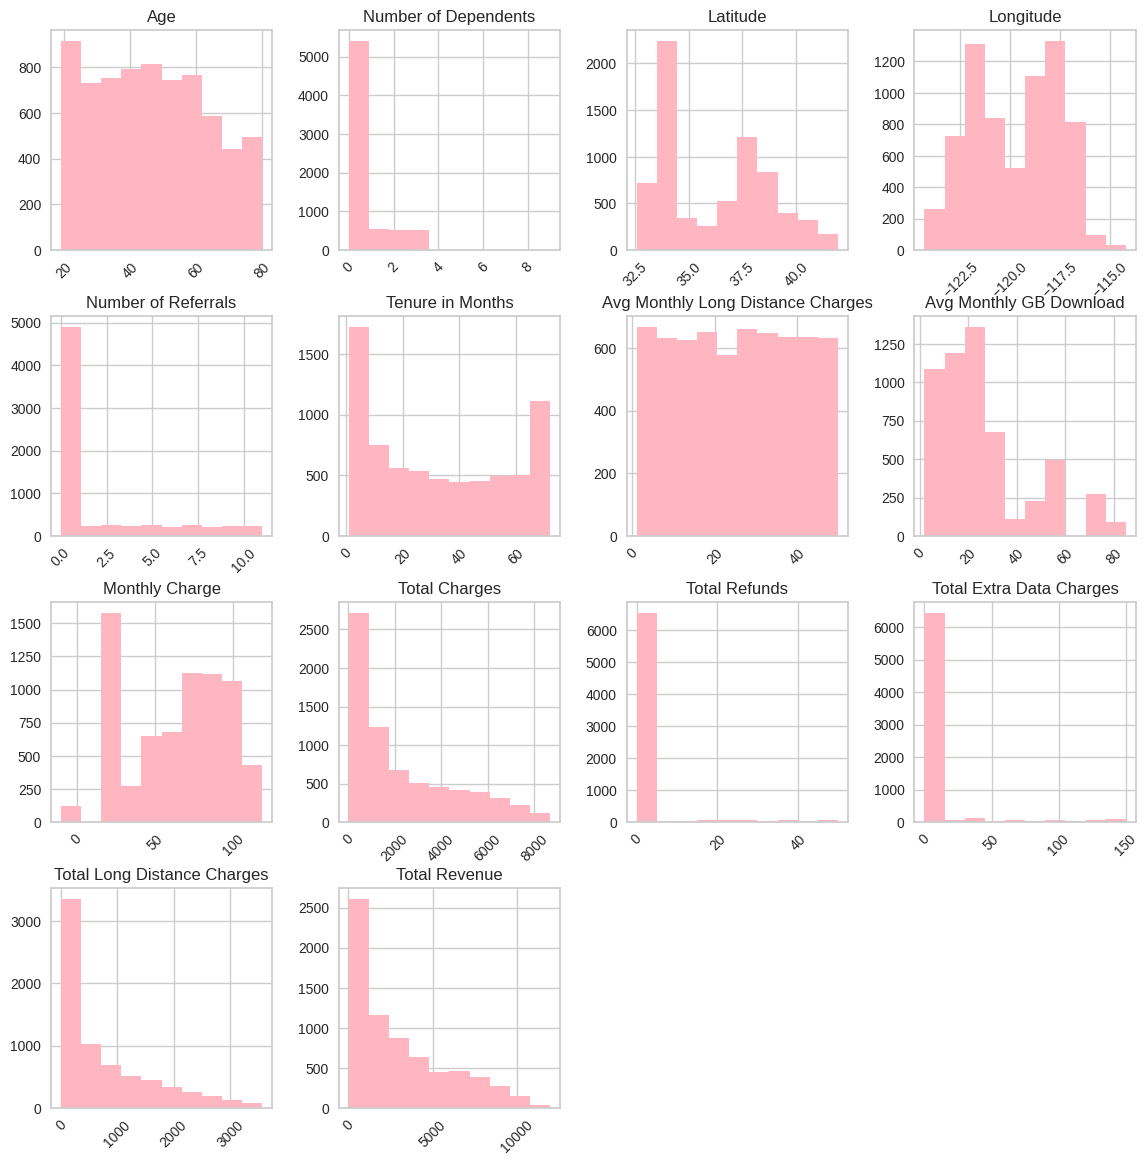

In [ ]:
df_num.hist(figsize=(14,14), xrot=45,color = "lightpink")

<Axes: >

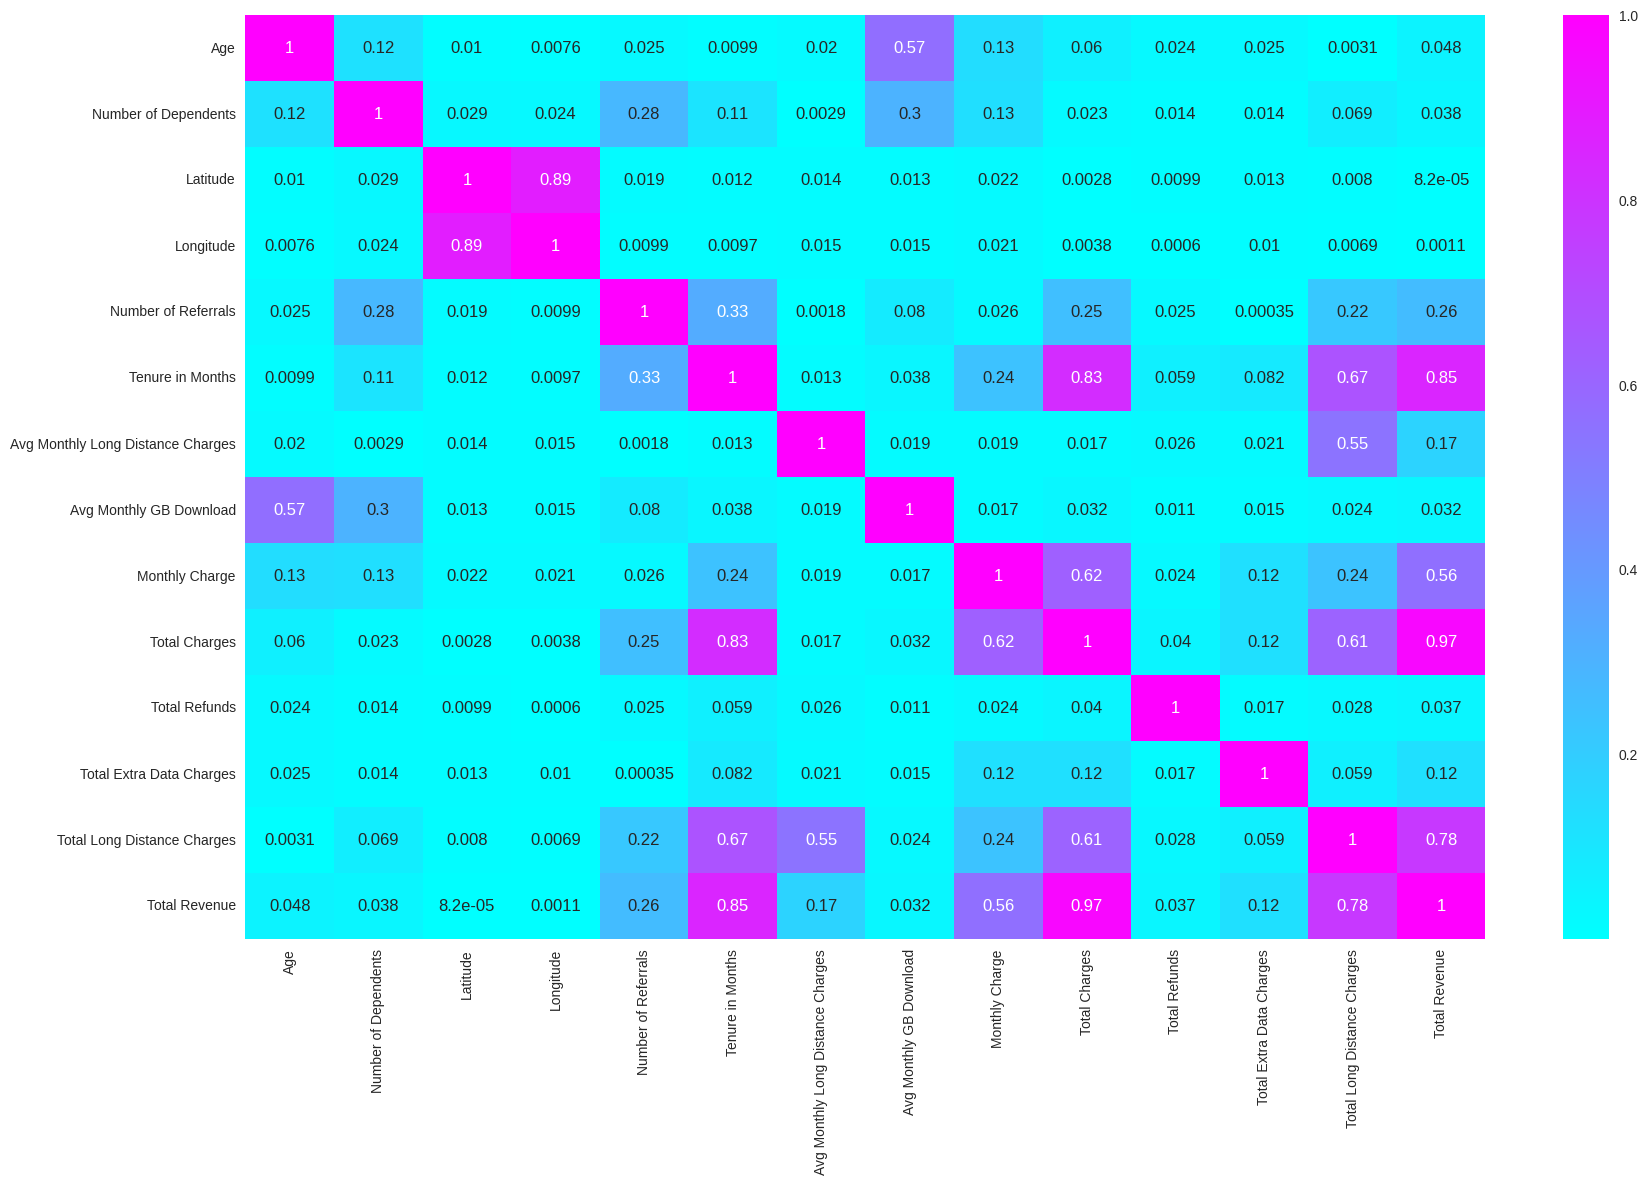

In [ ]:
cor = df_num.join(df_object['Customer Status']).corr().abs()
plt.figure(figsize=(20,12))
sns.heatmap(cor,annot=True,cmap='cool')

In [ ]:
s = cor.unstack()
#replacing all correlation values equal to 1 with 0, effectively removing the diagonal entries of the correlation matrix (which are always equal to 1).
#sorting the remaining correlation values in descending order.
# selecting  the top 20 highest correlation values.
so = s.replace(1,0).sort_values(kind="quicksort",ascending=False)[:20]
print(so)

Total Charges                Total Revenue                  0.972212
Total Revenue                Total Charges                  0.972212
Latitude                     Longitude                      0.885979
Longitude                    Latitude                       0.885979
Total Revenue                Tenure in Months               0.853146
Tenure in Months             Total Revenue                  0.853146
Total Charges                Tenure in Months               0.826074
Tenure in Months             Total Charges                  0.826074
Total Long Distance Charges  Total Revenue                  0.778559
Total Revenue                Total Long Distance Charges    0.778559
Total Long Distance Charges  Tenure in Months               0.674149
Tenure in Months             Total Long Distance Charges    0.674149
Total Charges                Monthly Charge                 0.622810
Monthly Charge               Total Charges                  0.622810
Total Long Distance Charges  Total

* Total Revenue : indique le revenu total de l'entreprise provenant de
ce client, calculé jusqu'à la fin du trimestre spécifié ci-dessus (frais totaux - remboursements totaux + frais de données supplémentaires totaux + frais interurbains totaux)
* Total Charges : indique le total des frais du client, calculé jusqu'à la fin du trimestre spécifié ci-dessus
* Durée en mois : indique le nombre total de mois que le client a passés avec l'entreprise à la fin du trimestre spécifié ci-dessus
* Total Long Distance Charges : Indique le total des frais d'interurbain du client au-delà de ceux spécifiés dans son forfait, à la fin du trimestre spécifié ci-dessus.
* Monthly charges: : indique le total des frais mensuels actuels du client pour tous ses services de l'entreprise

Based on the correlation maps we can drop Total Charges and Total Long Distance Charges being highly correlated with Total Revenue

In [ ]:
df_num = df_num.drop(['Total Charges','Total Long Distance Charges','Longitude','Latitude'],axis=1)

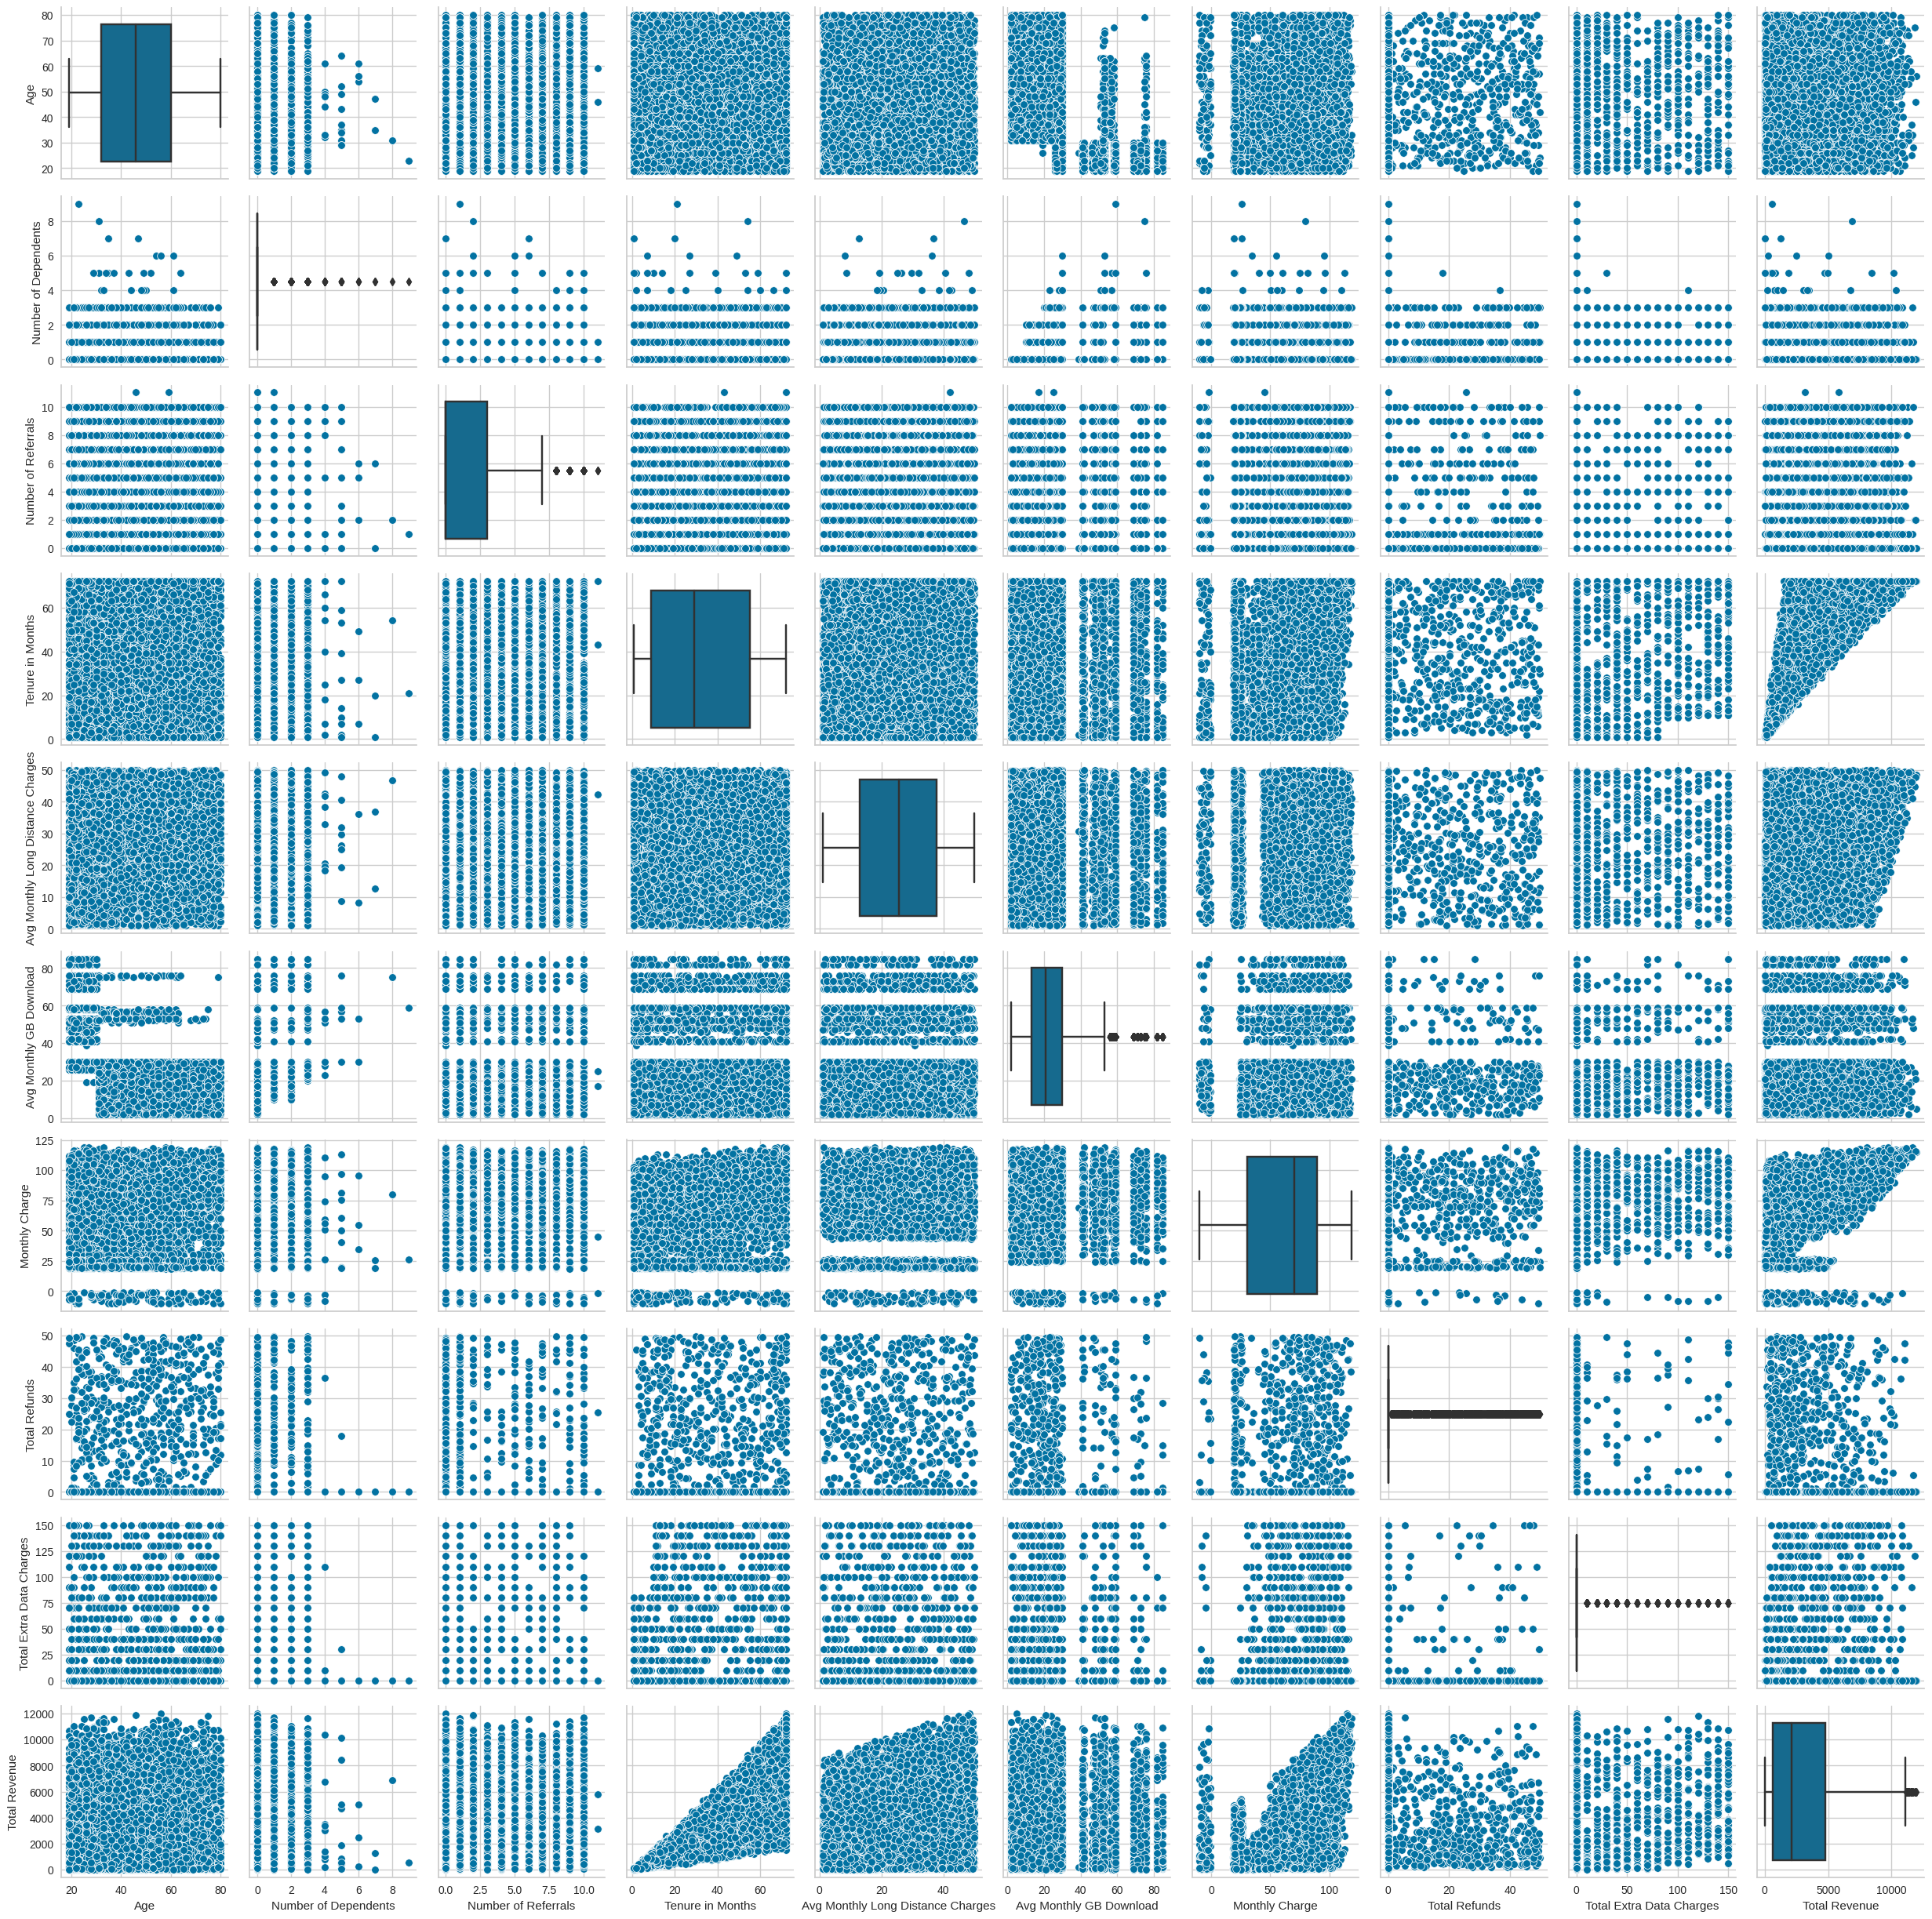

In [ ]:
p = sns.PairGrid(df_num);
p.map_diag(sns.boxplot)
p.map_offdiag(sns.scatterplot)

Avg Monthly GB Download:

<Axes: >

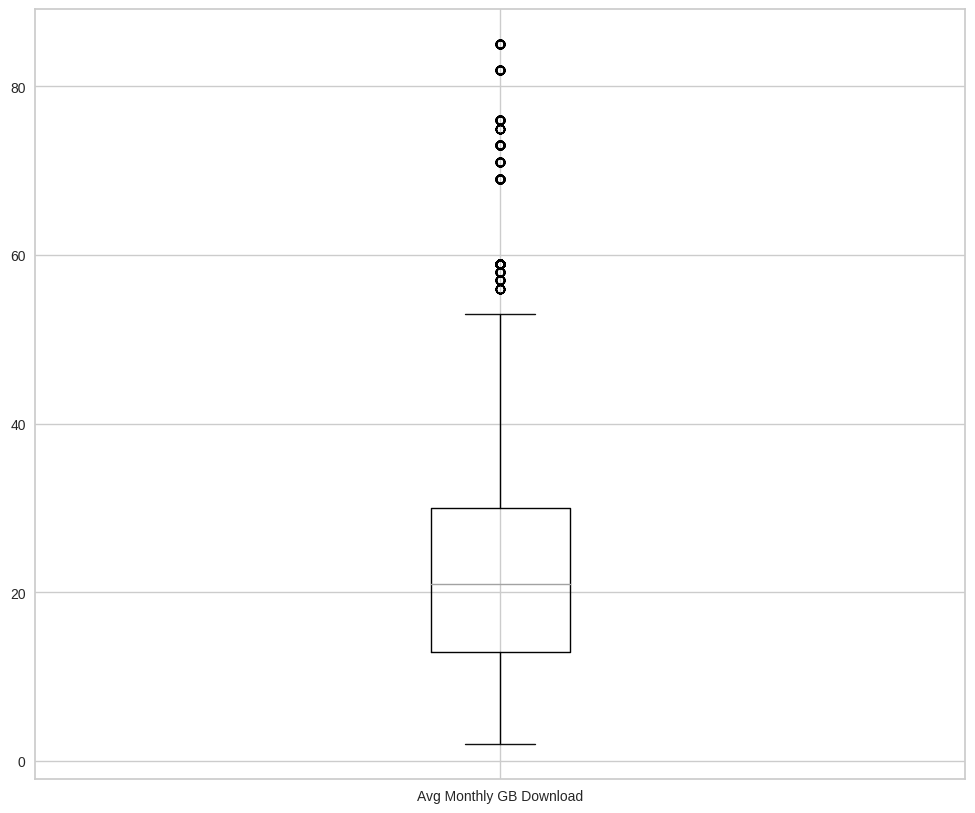

In [ ]:
df_num[['Avg Monthly GB Download']].boxplot(figsize=(12,10))

Nous devons analyser si les valeurs aberrantes que nous voyons dans le graphique ci-dessus sont significatives ou non. Pour ce faire, nous devons rechercher la raison d'un téléchargement aussi élevé
Voyons si l'âge a une influence

In [ ]:
df['Age']

0       37
1       46
2       50
3       78
4       75
        ..
7038    20
7039    40
7040    22
7041    21
7042    36
Name: Age, Length: 7043, dtype: int64

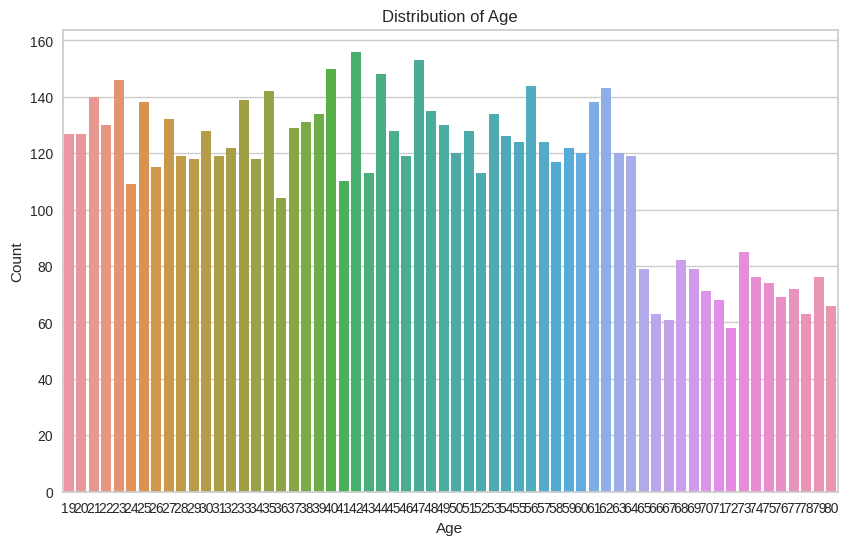

In [ ]:
plt.figure(figsize=(10,6))  # taille de la figure

# Créez la count plot avec Seaborn
sns.countplot(x='Age', data=df)

# Définir le titre et les étiquettes des axes
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')

# Afficher la plot
plt.show()

In [ ]:
bins = [19,30,45,60,80] # Define the bins for age ranges
names = ['19-30','30-45','45-60','60-80']# Define the names for the age ranges corresponding to the
# Create a new column in the DataFrame called 'AgeRange'
# This column will contain the age range of each person in the DataFrame based on their age
# The pd.cut() function is used to assign each person to their corresponding age range
df_object['AgeRange'] = pd.cut(df['Age'],bins, labels=names,include_lowest=True)

<Figure size 1600x1400 with 0 Axes>

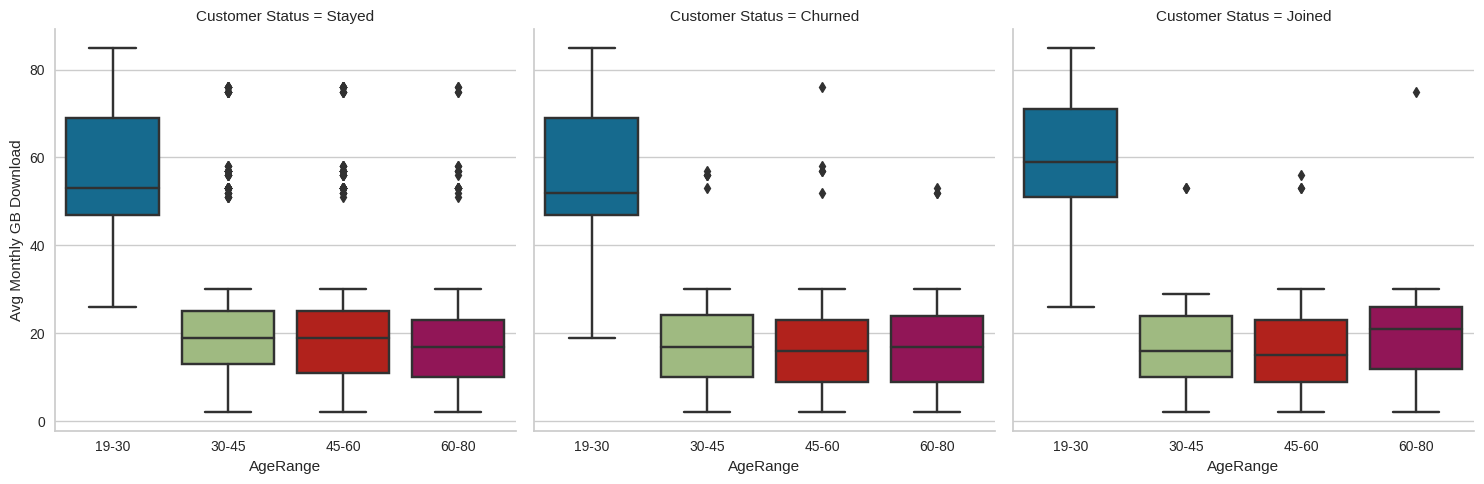

In [ ]:
plt.figure(figsize=(16,14))
sns.catplot(data=df_object.join(df_num),x='AgeRange',y='Avg Monthly GB Download', col ='Customer Status',kind='box')

younger people have by far the highest download flow than the other age groups.

**Extra Data Charges, Number of Dependents, Total Refunds and Number of Referrals:**

In [ ]:
#generate a single dataframe with the normalized counts of unique values for each of the four columns in 'df'.
pd.concat([df['Total Extra Data Charges'].value_counts(normalize=True).reset_index(),df['Number of Dependents'].value_counts(normalize=True).reset_index(),
          df['Total Refunds'].value_counts(normalize=True).reset_index(),df['Number of Referrals'].value_counts(normalize=True).reset_index()],axis=1).rename(columns={'index':'value'})

value  Total Extra Data Charges  value  Number of Dependents  value  \
0      0.0                  0.896635    0.0              0.768990   0.00   
1     10.0                  0.019594    1.0              0.078518  16.56   
2     40.0                  0.008803    2.0              0.075394   8.74   
3     30.0                  0.008235    3.0              0.073406   1.31   
4     20.0                  0.007241    5.0              0.001420  41.74   
..     ...                       ...    ...                   ...    ...   
495    NaN                       NaN    NaN                   NaN  31.90   
496    NaN                       NaN    NaN                   NaN  12.07   
497    NaN                       NaN    NaN                   NaN  37.37   
498    NaN                       NaN    NaN                   NaN  48.59   
499    NaN                       NaN    NaN                   NaN  10.20   

     Total Refunds  value  Number of Referrals  
0         0.925458    0.0             0.542524  
1         0.000284    1.0             0.154196  
2         0.000284    5.0             0.037484  
3         0.000284    3.0             0.036206  
4         0.000284    7.0             0.035212  
..             ...    ...                  ...  
495       0.000142    NaN                  NaN  
496       0.000142    NaN                  NaN  
497       0.000142    NaN                  NaN  
498       0.000142    NaN                  NaN  
499       0.000142    NaN                  NaN  

[500 rows x 8 columns]

'Total Refunds', 'Number of Dependents', 'Number of Referrals' and 'Total Extra Data Charges' are mostly populated by zero values therefore they could be transformed into a binary categorical variable

In [ ]:
df_object.loc[:,'Refunds_cat'] = np.where(df['Total Refunds'] == 0,'NO','YES')
df_object.loc[:,'Dependents_cat'] = np.where(df['Number of Dependents'] == 0,'NO','YES')
df_object.loc[:,'Extra_Data_Charges_cat'] = np.where(df['Total Extra Data Charges'] == 0,'NO','YES')
df_object.loc[:,'Referrals_cat'] = np.where(df['Number of Referrals'] == 0, 'NO', 'Yes')

**Numeric features vs target (Customer Status)**

<ipython-input-645-3e81de58a52c>:2: UserWarning:

When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.



array([<Axes: title={'center': 'Avg Monthly Long Distance Charges'}, xlabel='Customer Status'>,
       <Axes: title={'center': 'Number of Dependents'}, xlabel='Customer Status'>,
       <Axes: title={'center': 'Avg Monthly GB Download'}, xlabel='Customer Status'>,
       <Axes: title={'center': 'Monthly Charge'}, xlabel='Customer Status'>,
       <Axes: title={'center': 'Total Refunds'}, xlabel='Customer Status'>,
       <Axes: title={'center': 'Total Extra Data Charges'}, xlabel='Customer Status'>,
       <Axes: title={'center': 'Total Revenue'}, xlabel='Customer Status'>],
      dtype=object)

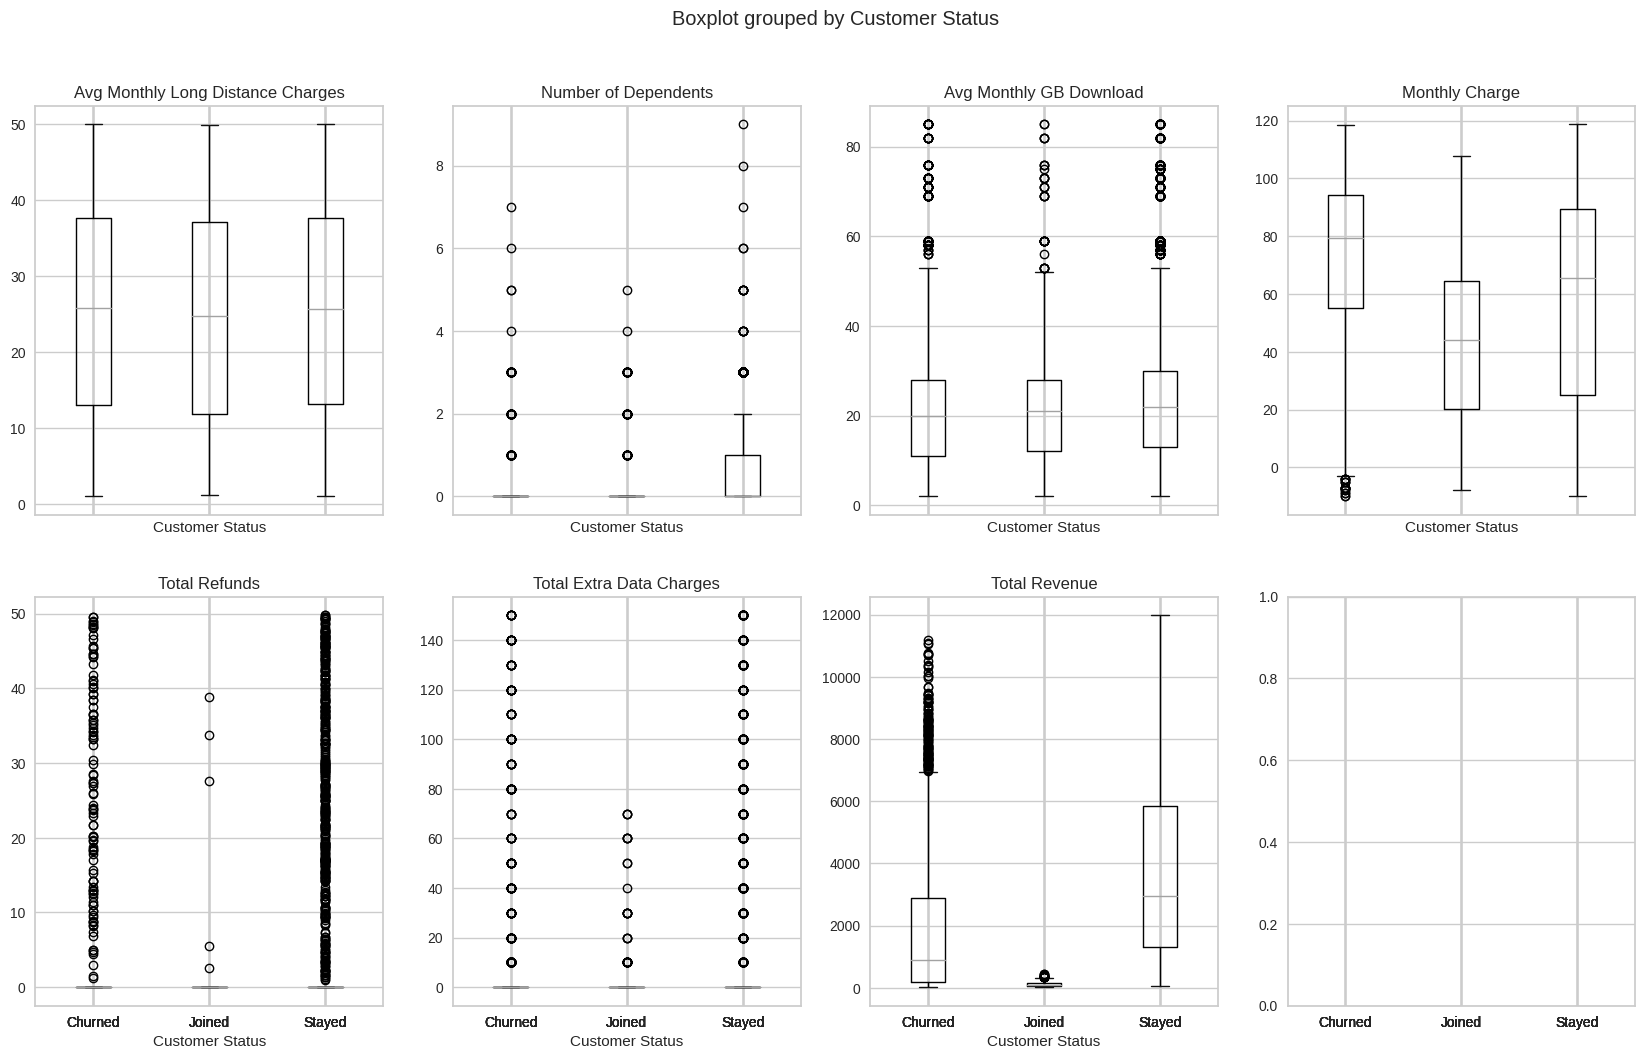

In [ ]:
fig, axes = plt.subplots(2,4,sharex=True,sharey=False,figsize=(20,12))
df_num.join(df['Customer Status']).boxplot(['Avg Monthly Long Distance Charges','Number of Dependents','Avg Monthly GB Download','Monthly Charge','Total Refunds','Total Extra Data Charges','Total Revenue'],'Customer Status',ax=axes.flatten()[:-1])

Conclusion:People who churned have on average higher monthly charges

<Figure size 1200x1000 with 0 Axes>

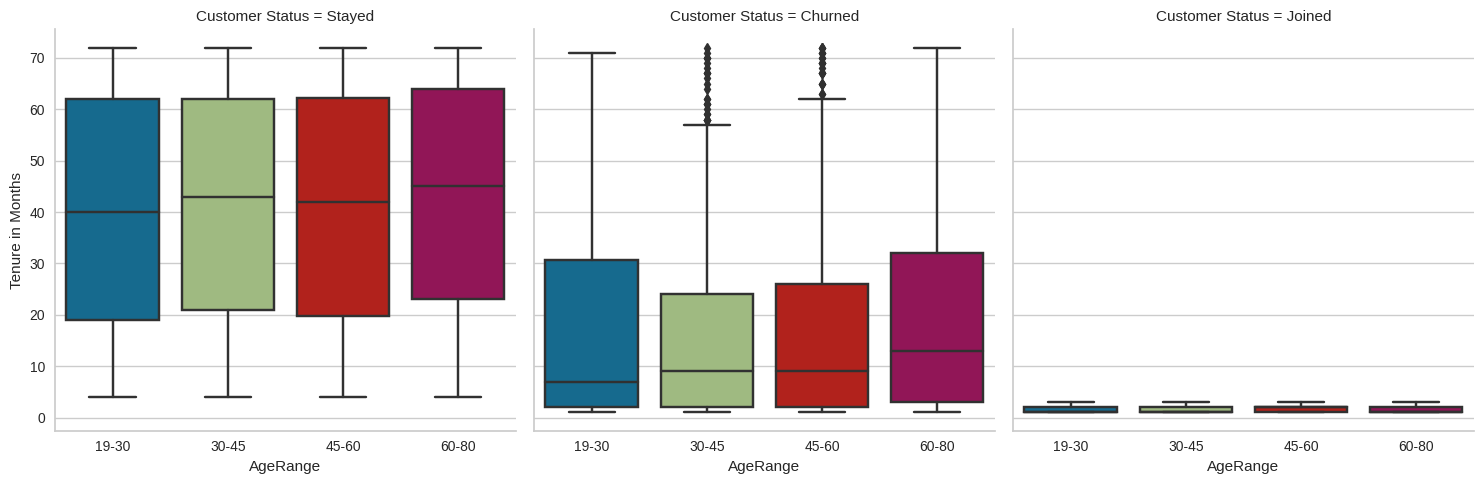

In [ ]:
plt.figure(figsize=(12,10))
sns.catplot(data=df_object.join(df_num),x='AgeRange',y='Tenure in Months',kind='box',col='Customer Status')

Conclusion: after thirty months the customer tends to remain loyal to the company

# Analyse variable categorique

In [ ]:
df_object = df_object.drop(['City','Zip Code'],axis=1)

In [ ]:
for col in df_object.columns:
    print('Feature "%s" has %i unique values'%(col, df_object[col].nunique()))

Feature "Gender" has 2 unique values
Feature "Married" has 2 unique values
Feature "Offer" has 6 unique values
Feature "Phone Service" has 2 unique values
Feature "Multiple Lines" has 2 unique values
Feature "Internet Service" has 2 unique values
Feature "Internet Type" has 3 unique values
Feature "Online Security" has 2 unique values
Feature "Online Backup" has 2 unique values
Feature "Device Protection Plan" has 2 unique values
Feature "Premium Tech Support" has 2 unique values
Feature "Streaming TV" has 2 unique values
Feature "Streaming Movies" has 2 unique values
Feature "Streaming Music" has 2 unique values
Feature "Unlimited Data" has 2 unique values
Feature "Contract" has 3 unique values
Feature "Paperless Billing" has 2 unique values
Feature "Payment Method" has 3 unique values
Feature "Customer Status" has 3 unique values
Feature "AgeRange" has 4 unique values
Feature "Refunds_cat" has 2 unique values
Feature "Dependents_cat" has 2 unique values
Feature "Extra_Data_Charges_ca

In [ ]:
df_object.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Gender                  7043 non-null   object  
 1   Married                 7043 non-null   object  
 2   Offer                   7043 non-null   object  
 3   Phone Service           7043 non-null   object  
 4   Multiple Lines          6361 non-null   object  
 5   Internet Service        7043 non-null   object  
 6   Internet Type           5517 non-null   object  
 7   Online Security         5517 non-null   object  
 8   Online Backup           5517 non-null   object  
 9   Device Protection Plan  5517 non-null   object  
 10  Premium Tech Support    5517 non-null   object  
 11  Streaming TV            5517 non-null   object  
 12  Streaming Movies        5517 non-null   object  
 13  Streaming Music         5517 non-null   object  
 14  Unlimited Data          

The variables  (Internet Type, Online Security, Online Backup, Device Protection Plan, Premium Tech Support, Streaming, Unlimited Data, Avg Monthly GB Download) have the same number of nan values. According to the description these are not missing values but indicates no subscrition to the internet service by the customer.

exemple

In [ ]:
df_object['Internet Service'].value_counts()

Yes    5517
No     1526
Name: Internet Service, dtype: int64

In [ ]:
df_object.join(df_num)[['Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan',
           'Premium Tech Support', 'Streaming TV', 'Streaming Movies','Streaming Music','Unlimited Data','Avg Monthly GB Download']].isna().sum()

Internet Type              1526
Online Security            1526
Online Backup              1526
Device Protection Plan     1526
Premium Tech Support       1526
Streaming TV               1526
Streaming Movies           1526
Streaming Music            1526
Unlimited Data             1526
Avg Monthly GB Download    1526
dtype: int64

In [ ]:
df_object[['Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan',
           'Premium Tech Support', 'Streaming TV', 'Streaming Movies','Streaming Music','Unlimited Data']] = df_object[['Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan',
           'Premium Tech Support', 'Streaming TV', 'Streaming Movies','Streaming Music','Unlimited Data']].replace(np.nan,'No Internet')
df_num['Avg Monthly GB Download'] = df_num['Avg Monthly GB Download'].replace(np.nan,0.0)

In [ ]:
df_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Gender                  7043 non-null   object  
 1   Married                 7043 non-null   object  
 2   Offer                   7043 non-null   object  
 3   Phone Service           7043 non-null   object  
 4   Multiple Lines          6361 non-null   object  
 5   Internet Service        7043 non-null   object  
 6   Internet Type           7043 non-null   object  
 7   Online Security         7043 non-null   object  
 8   Online Backup           7043 non-null   object  
 9   Device Protection Plan  7043 non-null   object  
 10  Premium Tech Support    7043 non-null   object  
 11  Streaming TV            7043 non-null   object  
 12  Streaming Movies        7043 non-null   object  
 13  Streaming Music         7043 non-null   object  
 14  Unlimited Data          

In [ ]:
df_object['Phone Service'].value_counts()

Yes    6361
No      682
Name: Phone Service, dtype: int64

In [ ]:
df_object['Multiple Lines'].isna().sum()

682

In [ ]:
df_num['Avg Monthly Long Distance Charges'].isna().sum()

682

In [ ]:
df_object[df_object['Multiple Lines'].isna()]
#Nan values associated to the variable 'Multiple Lines' are due to the fact that the customer is not subscribed to home phone service

Gender Married    Offer Phone Service Multiple Lines Internet Service  \
10      Male      No     None            No            NaN              Yes   
14    Female      No     None            No            NaN              Yes   
16    Female     Yes     None            No            NaN              Yes   
19      Male      No     None            No            NaN              Yes   
25    Female     Yes     None            No            NaN              Yes   
...      ...     ...      ...           ...            ...              ...   
6979  Female      No  Offer B            No            NaN              Yes   
6980  Female      No  Offer E            No            NaN              Yes   
6996  Female      No  Offer D            No            NaN              Yes   
7016    Male     Yes     None            No            NaN              Yes   
7042    Male     Yes     None            No            NaN              Yes   

     Internet Type Online Security Online Backup Device Protection Plan  ...  \
10           Cable             Yes            No                     No  ...   
14             DSL             Yes           Yes                    Yes  ...   
16             DSL             Yes            No                    Yes  ...   
19           Cable              No            No                     No  ...   
25             DSL             Yes            No                     No  ...   
...            ...             ...           ...                    ...  ...   
6979         Cable              No           Yes                    Yes  ...   
6980           DSL              No            No                     No  ...   
6996           DSL             Yes            No                    Yes  ...   
7016           DSL              No           Yes                    Yes  ...   
7042         Cable             Yes           Yes                    Yes  ...   

     Unlimited Data        Contract Paperless Billing   Payment Method  \
10              Yes        Two Year                No      Credit Card   
14              Yes        Two Year                No  Bank Withdrawal   
16              Yes        One Year                No      Credit Card   
19              Yes  Month-to-Month               Yes  Bank Withdrawal   
25              Yes  Month-to-Month                No  Bank Withdrawal   
...             ...             ...               ...              ...   
6979            Yes        Two Year               Yes  Bank Withdrawal   
6980            Yes  Month-to-Month                No      Credit Card   
6996            Yes        Two Year                No      Credit Card   
7016            Yes        One Year               Yes      Credit Card   
7042            Yes        Two Year                No  Bank Withdrawal   

     Customer Status AgeRange Refunds_cat Dependents_cat  \
10            Stayed    45-60          NO             NO   
14            Stayed    30-45          NO             NO   
16            Stayed    45-60          NO            YES   
19           Churned    60-80          NO             NO   
25           Churned    30-45          NO            YES   
...              ...      ...         ...            ...   
6979          Stayed    60-80          NO             NO   
6980         Churned    60-80          NO             NO   
6996          Stayed    45-60          NO             NO   
7016          Stayed    19-30          NO             NO   
7042          Stayed    30-45          NO             NO   

     Extra_Data_Charges_cat Referrals_cat  
10                       NO            NO  
14                       NO            NO  
16                       NO            NO  
19                       NO            NO  
25                       NO           Yes  
...                     ...           ...  
6979                     NO            NO  
6980                     NO            NO  
6996                     NO            NO  
7016                     NO           Yes  
70

In [ ]:
df_object['Multiple Lines'] = df_object['Multiple Lines'].replace(np.nan,'NO phone Service')
df_num['Avg Monthly Long Distance Charges'] = df_num['Avg Monthly Long Distance Charges'].replace(np.nan,'NO phone Service')

In [ ]:
df_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Gender                  7043 non-null   object  
 1   Married                 7043 non-null   object  
 2   Offer                   7043 non-null   object  
 3   Phone Service           7043 non-null   object  
 4   Multiple Lines          7043 non-null   object  
 5   Internet Service        7043 non-null   object  
 6   Internet Type           7043 non-null   object  
 7   Online Security         7043 non-null   object  
 8   Online Backup           7043 non-null   object  
 9   Device Protection Plan  7043 non-null   object  
 10  Premium Tech Support    7043 non-null   object  
 11  Streaming TV            7043 non-null   object  
 12  Streaming Movies        7043 non-null   object  
 13  Streaming Music         7043 non-null   object  
 14  Unlimited Data          

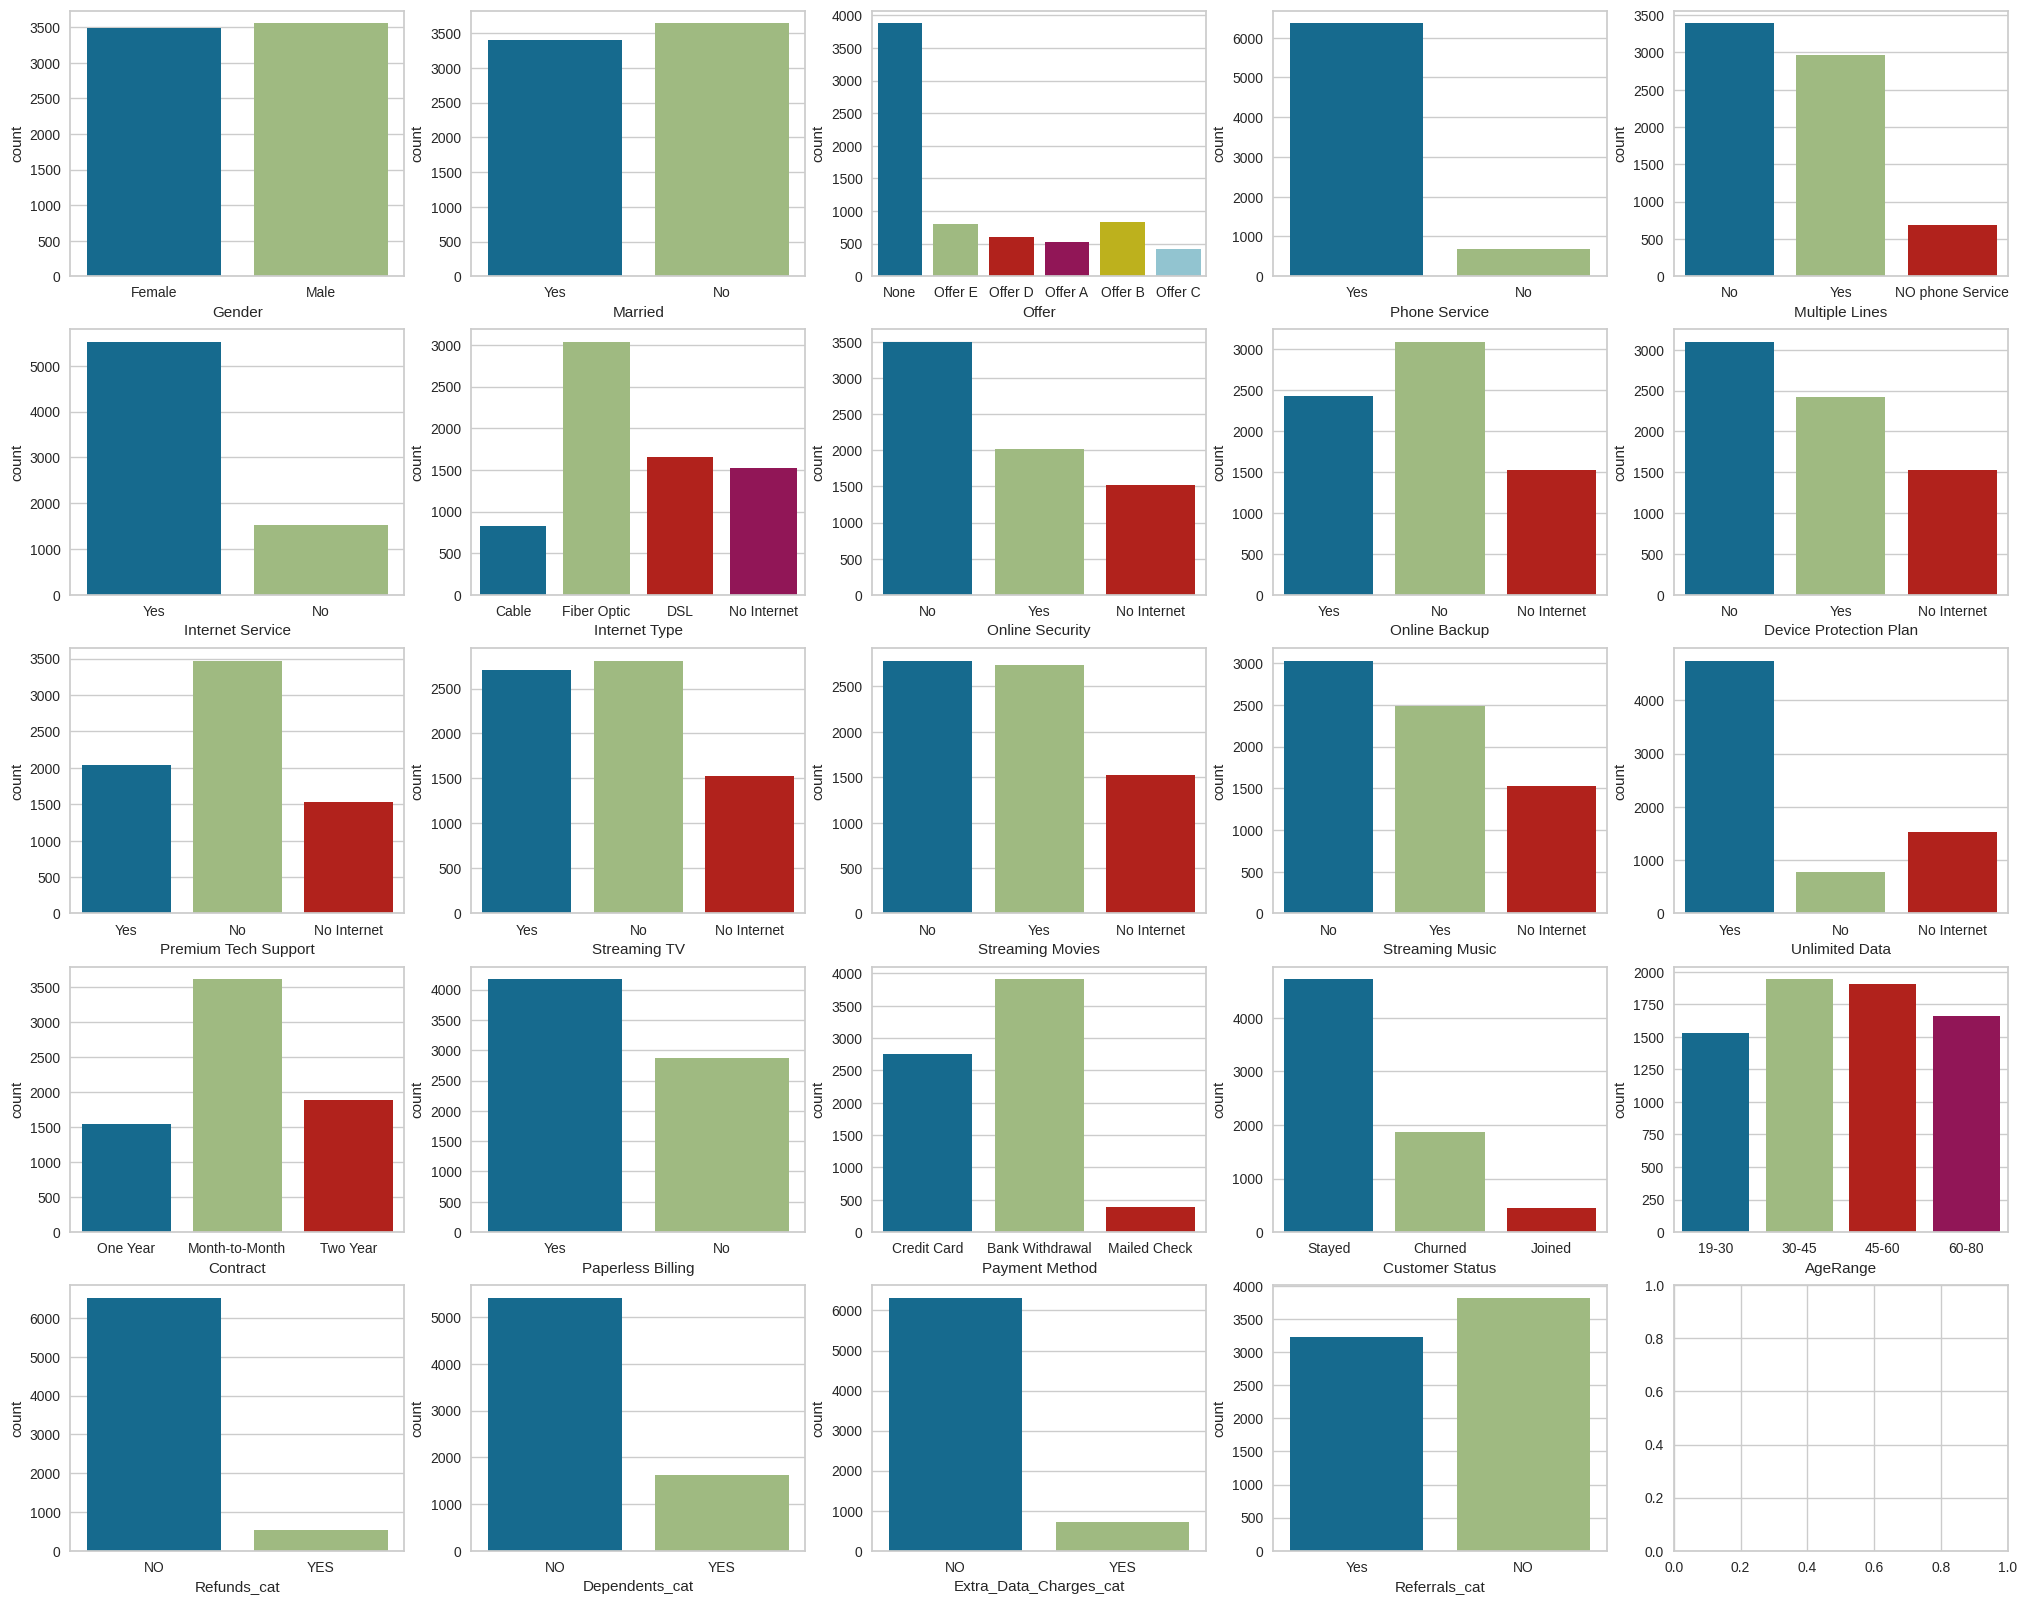

In [ ]:
#Categorical
fig, axes = plt.subplots(5,5,figsize=(25,20))
for i,col in enumerate(df_object.columns):
    sns.countplot(data=df_object,x=col,ax=axes.flat[i])

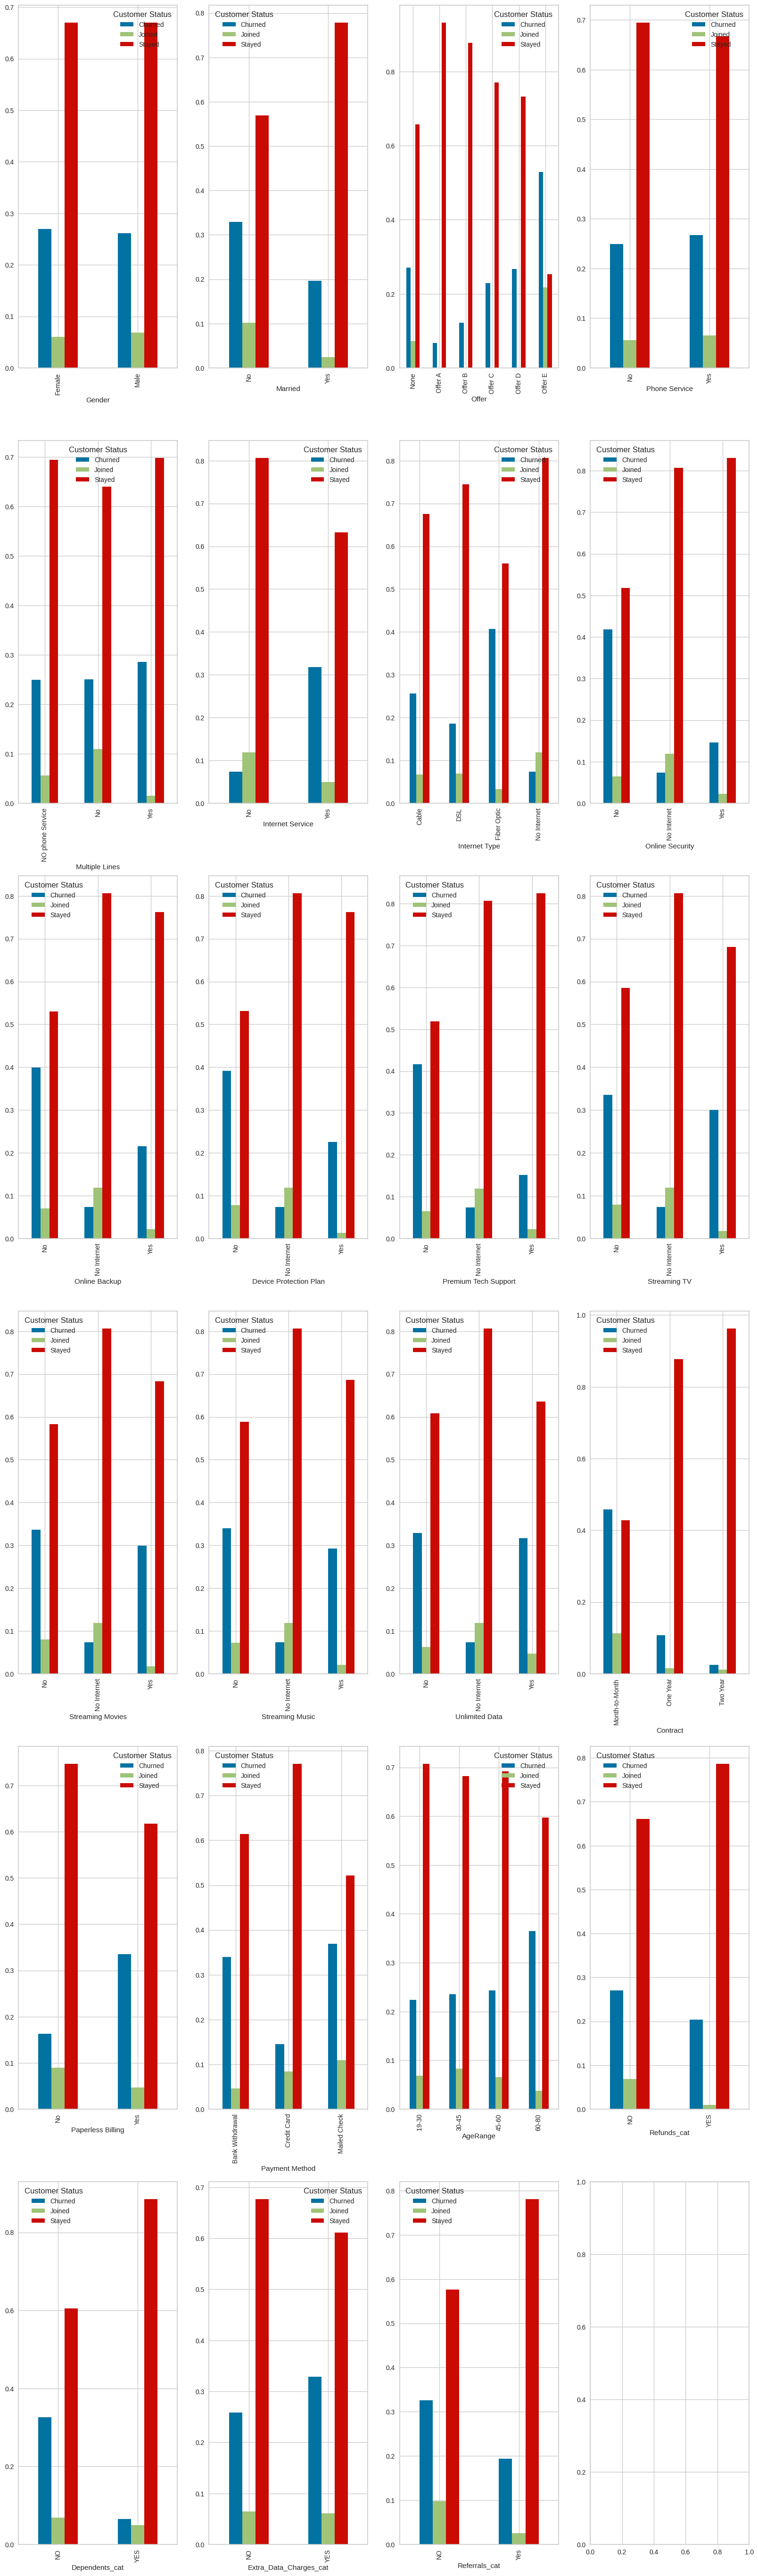

In [ ]:
i=0
fig,axes=plt.subplots(6,4,figsize=(20,70))
for col in df_object.columns:
    if col != 'Customer Status':
        pd.crosstab(df_object[col],df_object['Customer Status'],normalize='index').plot(kind='bar',ax=axes.flat[i])
        i+=1

Resultat;


* Les personnes mariées ont tendance à rester fidèles à l'entreprise
Les personnes souscrivant l'offre "E" sont susceptibles de désabonnement
* Les personnes qui n'ont pas de service Internet sont plus susceptibles de se désabonner que les personnes qui n'en ont pas
* Les personnes n'ayant pas online security, online Backup, Device Protection Plan and Premium Tech Support ( de sécurité en ligne, de sauvegarde en ligne, de plan de protection de l'appareil et de support technique Premium) sont plus susceptibles de se désabonner que les personnes qui en ont
* Les personnes qui n'ont pas de personnes à charge vivant avec elles sont plus susceptibles de se désabonner que les personnes qui ont



**Pourquoi les personnes abonnées à l'offre E sont plus susceptibles de se desabonné ?**

<Axes: title={'center': 'Average Monthly Charges depending on the offer'}, xlabel='Offer'>

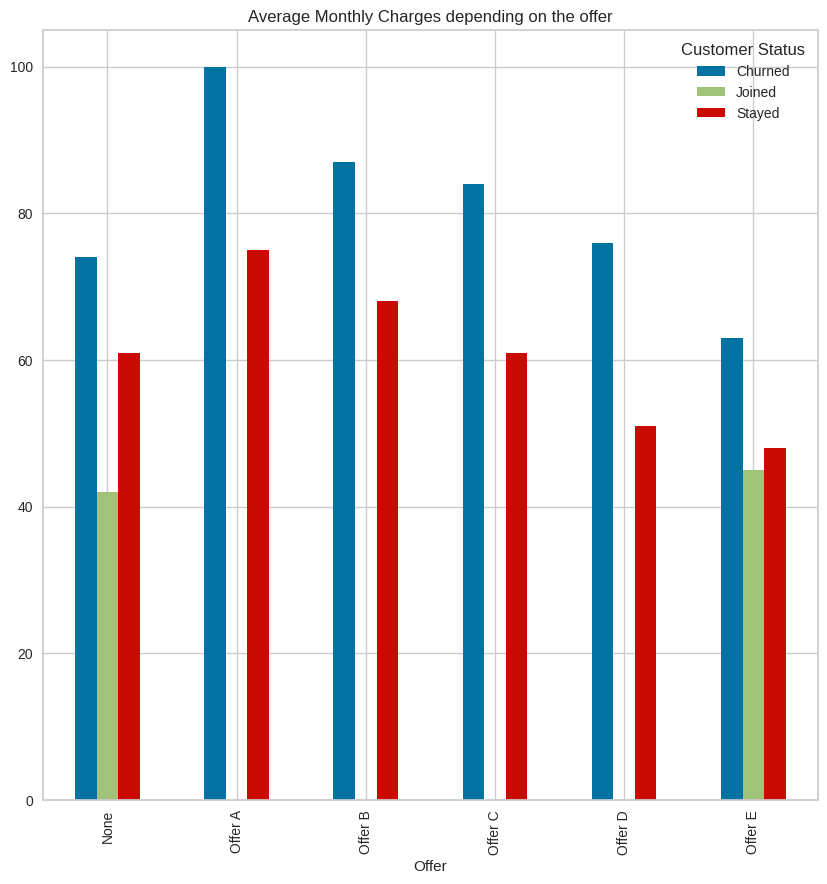

In [ ]:
pd.crosstab(df['Offer'],df['Customer Status'],values=df['Monthly Charge'],aggfunc=np.mean).round(0).plot(kind='bar',title='Average Monthly Charges depending on the offer',figsize=(10,10))

Les personnes souscrivant à l'offre E ont les charges mensuelles les plus basses, donc ce n'est pas une question d'argent. Il s'agit probablement de la qualité de l'offre

**Analyse de  la distribution du statut du client en fonction de la variable de charge mensuelle**

## Test Hypothése

* Question  : Y a-t-il une relation significative entre les charges de
services  et le choix de désabonnement ?
* Hypothèse H0 (with) : Les clients ayant souscrit à des offres avec des services supplémentaires tels que la sécurité en ligne, la sauvegarde en ligne, la protection de l'appareil ou l'assistance technique premium sont moins susceptibles de se désabonner des services de télécommunication.




In [ ]:
from scipy.stats import chi2_contingency
# Create a contingency table of the services subscribed and the choice of unsubscribing
cont_table = pd.crosstab(df_object['Premium Tech Support'],df_object['Customer Status'])

# Perform the chi-square test
stat, p, dof, expected = chi2_contingency(cont_table)

# Define the significance level
alpha = 0.05

# Print the results of the test
if p < alpha:
    print("There is a significant relationship between the services subscribed and the choice of unsubscribing.")
else:
    print("There is no significant relationship between the services subscribed and the choice of unsubscribing.")

# Print the contingency table
print("Contingency Table:")
print(cont_table)

# Print the expected frequencies
print("\nExpected Frequencies:")
print(pd.DataFrame(expected, index=cont_table.index, columns=cont_table.columns))

# Print the test statistic, p-value, and degrees of freedom
print("\nTest Statistic: {:.2f}".format(stat))
print("p-value: {:.4f}".format(p))
print("Degrees of Freedom: {}".format(dof))



There is a significant relationship between the services subscribed and the choice of unsubscribing.
Contingency Table:
Customer Status       Churned  Joined  Stayed
Premium Tech Support                         
No                       1446     225    1802
No Internet               113     182    1231
Yes                       310      47    1687

Expected Frequencies:
Customer Status          Churned      Joined       Stayed
Premium Tech Support                                     
No                    921.629561  223.873633  2327.496805
No Internet           404.954423   98.367741  1022.677836
Yes                   542.416016  131.758626  1369.825359

Test Statistic: 968.57
p-value: 0.0000
Degrees of Freedom: 4


Sur la base du tableau de contingence et des résultats du test du chi carré, nous pouvons conclure qu'il existe une relation significative entre les services souscrits et le choix de se désabonner. La valeur p de 0,0000 indique que l'association observée entre les variables est peu susceptible de se produire par hasard.


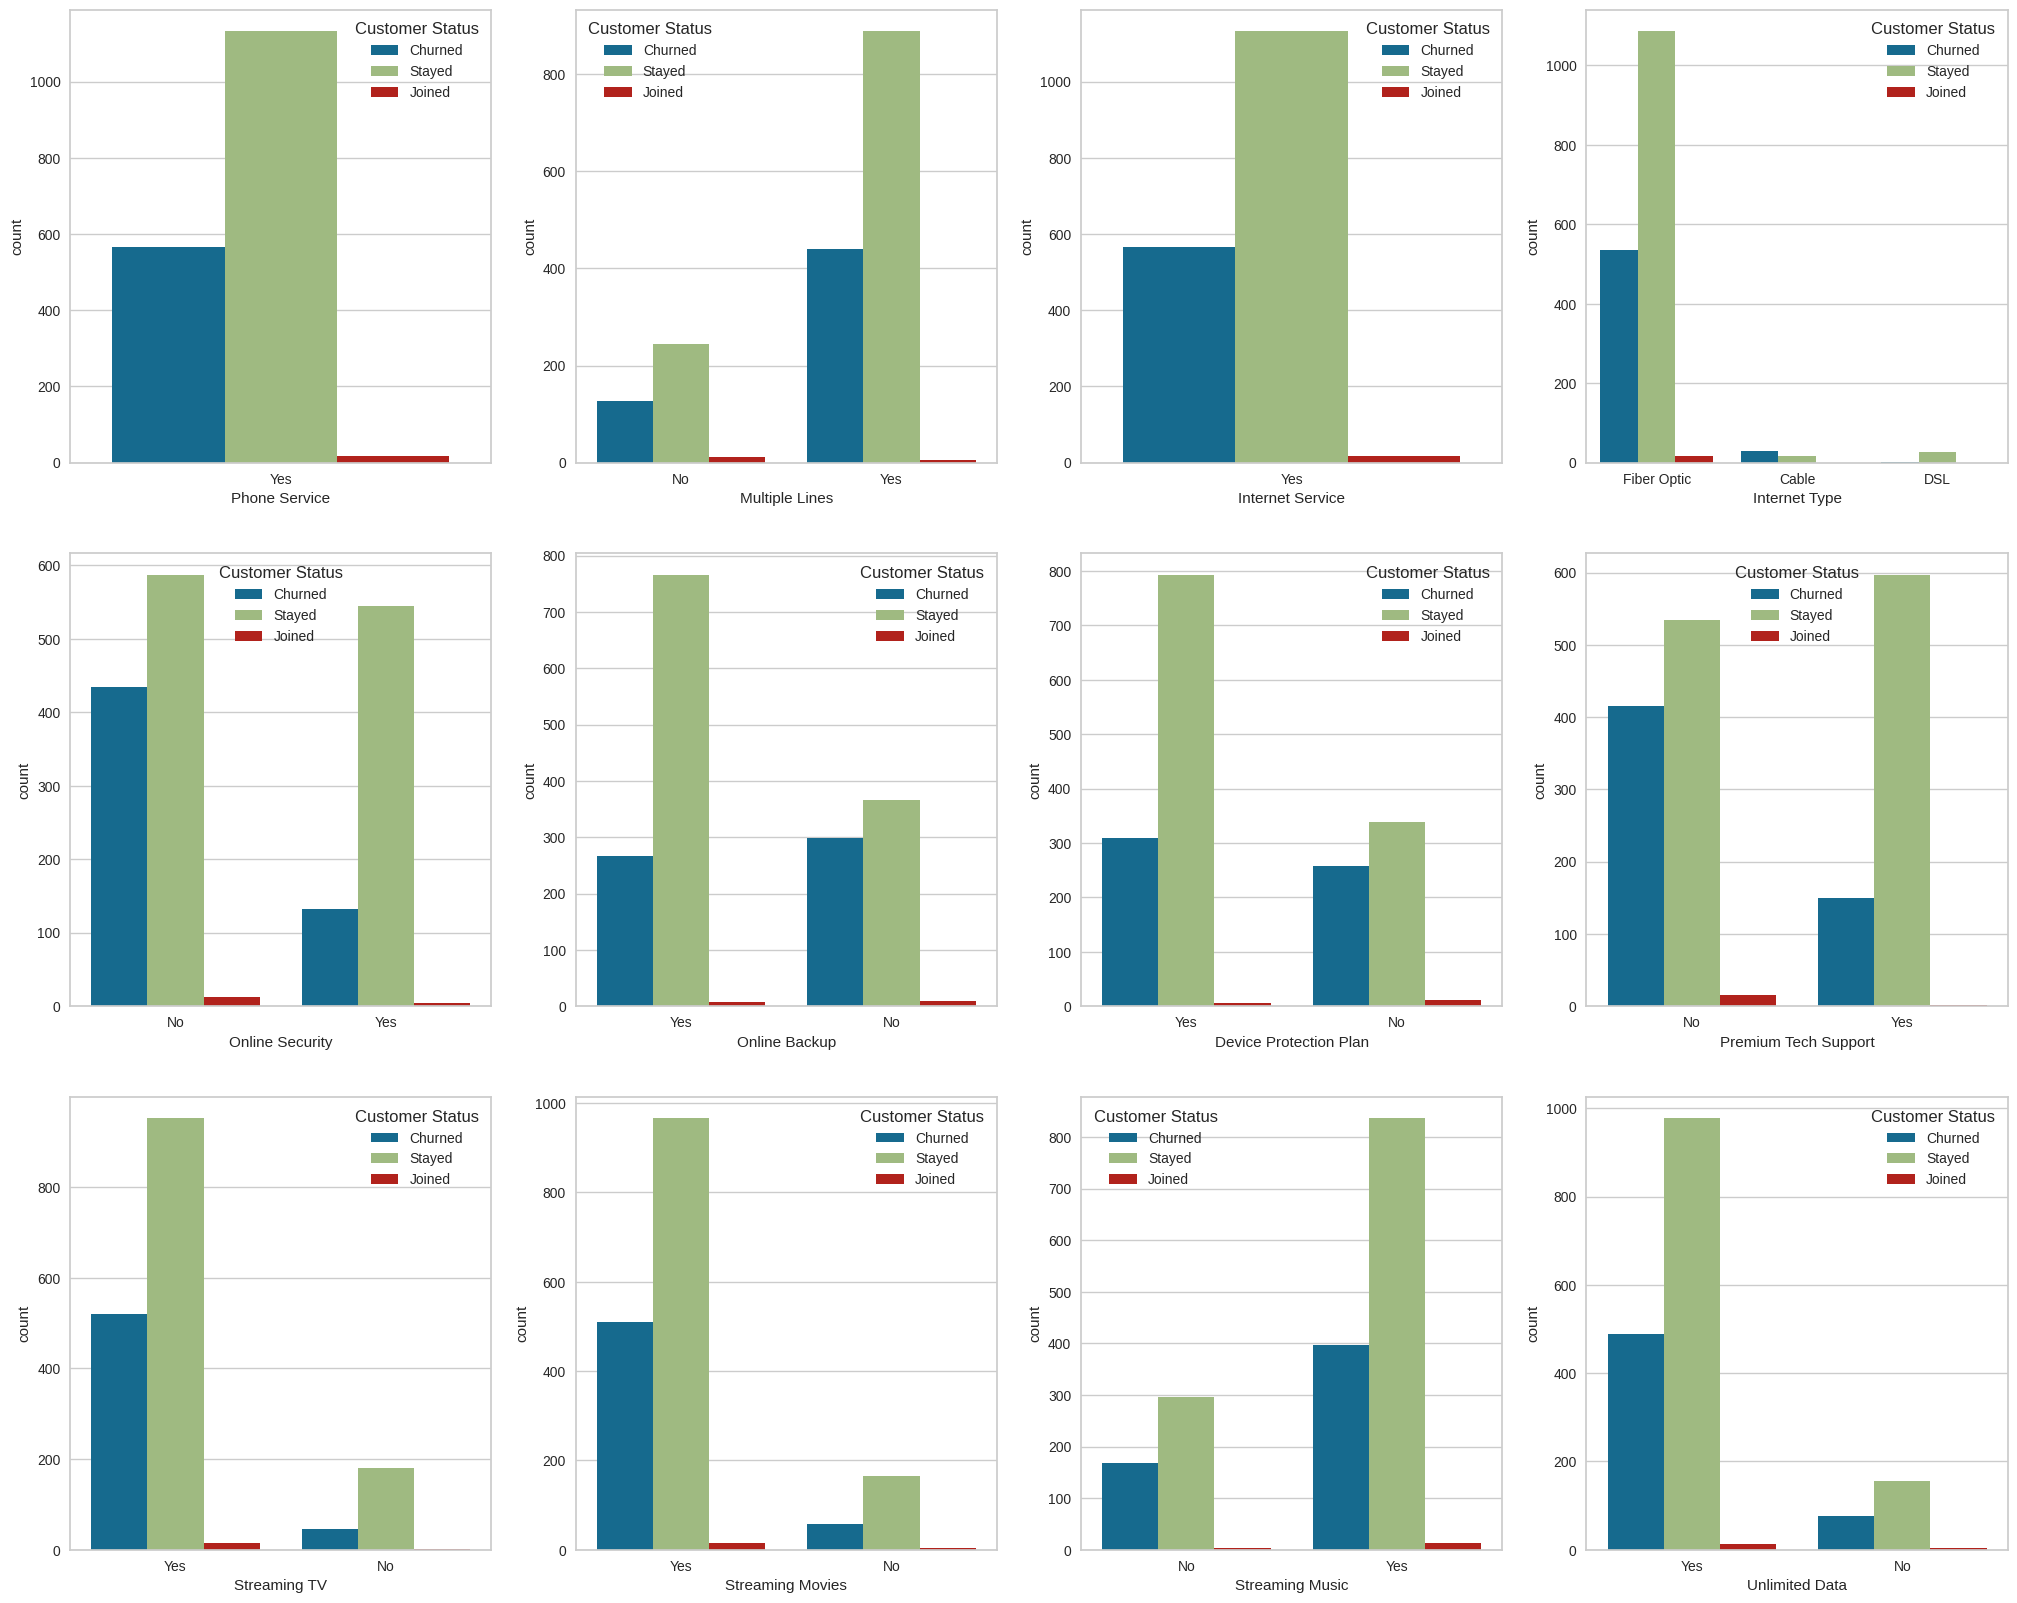

In [ ]:
bins = [0,30,70,90,119]# defining the bins for categorizing the charges
names = ['0-30','30-70','70-90','90-119'] # defining the categories based on the bins
#Adding a new column called "Charges" to the dataframe "df_object" which categorizes the "Monthly Charge" into different bins.
df_object['Charges'] = pd.cut(df['Monthly Charge'],bins, labels=names,include_lowest=True)
#the Display of the number of customers for each categorical variable who have monthly charges between 90 and 119.
fig, axes = plt.subplots(3,4,figsize=(25,20))
for i,col in enumerate(['Phone Service','Multiple Lines','Internet Service','Internet Type','Online Security','Online Backup','Device Protection Plan','Premium Tech Support','Streaming TV','Streaming Movies','Streaming Music','Unlimited Data']):
    sns.countplot(data=df_object[df_object['Charges'] == '90-119'],x=col,ax=axes.flat[i],hue='Customer Status')

Resultat les personnes payant des charges mensuelles élevées sont plus susceptibles de se désabonner si elles n'ont pas de services supplémentaires  (Online Security, Online Backup, Device Protection Plan, Premium Tech Support, Streaming TV etc ...) inclus dans leur plan.

# Data processing

In [ ]:
df = df.drop(['Zip Code','Latitude','Longitude','City'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   object 
 3   Number of Dependents               7043 non-null   int64  
 4   Number of Referrals                7043 non-null   int64  
 5   Tenure in Months                   7043 non-null   int64  
 6   Offer                              7043 non-null   object 
 7   Phone Service                      7043 non-null   object 
 8   Avg Monthly Long Distance Charges  6361 non-null   float64
 9   Multiple Lines                     6361 non-null   object 
 10  Internet Service                   7043 non-null   object 
 11  Internet Type                      5517 non-null   objec

In [ ]:
# --- Replacing Nan values according to the EDA ---

df[['Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan',
           'Premium Tech Support', 'Streaming TV', 'Streaming Movies','Streaming Music','Unlimited Data']] = df[['Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan',
           'Premium Tech Support', 'Streaming TV', 'Streaming Movies','Streaming Music','Unlimited Data']].replace(np.nan,'No Internet')
df['Avg Monthly GB Download'] = df['Avg Monthly GB Download'].replace(np.nan,0.0)
df['Multiple Lines'] = df['Multiple Lines'].replace(np.nan,'NO phone Service')
df['Avg Monthly Long Distance Charges'] = df['Avg Monthly Long Distance Charges'].replace(np.nan,0.0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   object 
 3   Number of Dependents               7043 non-null   int64  
 4   Number of Referrals                7043 non-null   int64  
 5   Tenure in Months                   7043 non-null   int64  
 6   Offer                              7043 non-null   object 
 7   Phone Service                      7043 non-null   object 
 8   Avg Monthly Long Distance Charges  7043 non-null   float64
 9   Multiple Lines                     7043 non-null   object 
 10  Internet Service                   7043 non-null   object 
 11  Internet Type                      7043 non-null   objec

In [ ]:
#We assume that the negative values in the Monthly charge variable are erroneous.
df = df[df['Monthly Charge'] >= 0]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6923 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             6923 non-null   object 
 1   Age                                6923 non-null   int64  
 2   Married                            6923 non-null   object 
 3   Number of Dependents               6923 non-null   int64  
 4   Number of Referrals                6923 non-null   int64  
 5   Tenure in Months                   6923 non-null   int64  
 6   Offer                              6923 non-null   object 
 7   Phone Service                      6923 non-null   object 
 8   Avg Monthly Long Distance Charges  6923 non-null   float64
 9   Multiple Lines                     6923 non-null   object 
 10  Internet Service                   6923 non-null   object 
 11  Internet Type                      6923 non-null   objec

In [ ]:
# --- Data Set splitting ---
X = df.drop('Customer Status',axis=1)
y = df['Customer Status']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=321)
X_train

Gender  Age Married  Number of Dependents  Number of Referrals  \
697     Male   79     Yes                     0                    1   
2507    Male   23     Yes                     0                    2   
1892  Female   22      No                     0                    0   
1789  Female   24      No                     0                    0   
3794  Female   65     Yes                     3                    7   
...      ...  ...     ...                   ...                  ...   
205     Male   28     Yes                     0                    1   
4613  Female   21      No                     0                    0   
3480    Male   47      No                     0                    0   
5408  Female   41     Yes                     0                    3   
5514  Female   39     Yes                     2                    8   

      Tenure in Months    Offer Phone Service  \
697                 30  Offer C           Yes   
2507                51  Offer B           Yes   
1892                63  Offer B           Yes   
1789                12  Offer D           Yes   
3794                65  Offer B           Yes   
...                ...      ...           ...   
205                 23     None           Yes   
4613                 6     None            No   
3480                18     None           Yes   
5408                53  Offer B           Yes   
5514                72     None           Yes   

      Avg Monthly Long Distance Charges    Multiple Lines  ... Unlimited Data  \
697                               48.02               Yes  ...            Yes   
2507                              39.32               Yes  ...            Yes   
1892                               8.38               Yes  ...            Yes   
1789                              30.54               Yes  ...            Yes   
3794                              19.58               Yes  ...            Yes   
...                                 ...               ...  ...            ...   
205                               37.95                No  ...            Yes   
4613                               0.00  NO phone Service  ...             No   
3480                              33.80               Yes  ...             No   
5408                              37.14               Yes  ...            Yes   
5514                              18.74               Yes  ...            Yes   

            Contract  Paperless Billing   Payment Method Monthly Charge  \
697   Month-to-Month                Yes  Bank Withdrawal         101.50   
2507        One Year                Yes  Bank Withdrawal         111.55   
1892        One Year                 No  Bank Withdrawal          99.90   
1789  Month-to-Month                Yes  Bank Withdrawal         100.15   
3794        One Year                Yes  Bank Withdrawal         107.45   
...              ...                ...              ...            ...   
205   Month-to-Month                Yes  Bank Withdrawal          99.85   
4613        Two Year                Yes     Mailed Check          63.40   
3480  Month-to-Month                 No      Credit Card          56.25   
5408        One Year                 No  Bank Withdrawal          74.10   
5514        Two Year                Yes  Bank Withdrawal          95.10   

     Total Charges Total Refunds Total Extra Data Charges  \
697        2917.65           0.0                        0   
2507       5720.35           0.0                        0   
1892       6137.00           0.0                        0   
1789       1164.30           0.0                        0   
3794       7047.50           0.0                        0   
...            ...           ...                      ...   
205        2331.30           0.0                        0   
4613        348.80           0.0                       10   
3480        969.85           0.0                       30   
5408       3833.95           0.0                        0   
5514   

In [ ]:
#--- Label encoding the Ordinal Internet Type Variable ---(dsl<cable<fibre optique)
ord_encoder = LabelEncoder()
X_train['Internet Type'] = ord_encoder.fit_transform(X_train['Internet Type'])
X_test['Internet Type'] = ord_encoder.transform(X_test['Internet Type'])

In [ ]:
#--- Standardizing numeric columns ---
num_col = X_train.select_dtypes('number').columns
std_scaler = StandardScaler()
X_train[num_col] = std_scaler.fit_transform(X_train[num_col])
X_test[num_col] = std_scaler.transform(X_test[num_col])

In [ ]:
X_train[num_col]

Age  Number of Dependents  Number of Referrals  Tenure in Months  \
697   1.945836             -0.488500            -0.321659         -0.092412   
2507 -1.402134             -0.488500             0.011365          0.762789   
1892 -1.461919             -0.488500            -0.654683          1.251475   
1789 -1.342349             -0.488500            -0.654683         -0.825441   
3794  1.108843              2.612739             1.676487          1.332923   
...        ...                   ...                  ...               ...   
205  -1.103208             -0.488500            -0.321659         -0.377479   
4613 -1.521705             -0.488500            -0.654683         -1.069784   
3480  0.032710             -0.488500            -0.654683         -0.581098   
5408 -0.326001             -0.488500             0.344390          0.844237   
5514 -0.445571              1.578993             2.009511          1.617990   

      Avg Monthly Long Distance Charges  Internet Type  \
697                            1.627270       0.279708   
2507                           1.063328       0.279708   
1892                          -0.942232       0.279708   
1789                           0.494200       0.279708   
3794                          -0.216238       0.279708   
...                                 ...            ...   
205                            0.974523       0.279708   
4613                          -1.485432      -1.874703   
3480                           0.705516      -1.874703   
5408                           0.922018      -1.874703   
5514                          -0.270687       0.279708   

      Avg Monthly GB Download  Monthly Charge  Total Charges  Total Refunds  \
697                  0.157671        1.212921       0.274618      -0.241366   
2507                 2.679213        1.546314       1.501491      -0.241366   
1892                 1.854863        1.159843       1.683878      -0.241366   
1789                 1.272968        1.168136      -0.492906      -0.241366   
3794                 0.254653        1.410303       2.082447      -0.241366   
...                       ...             ...            ...            ...   
205                  0.303144        1.158184       0.017945      -0.241366   
4613                 1.515424       -0.050989      -0.849889      -0.241366   
3480                -0.181768       -0.288180      -0.578026      -0.241366   
5408                -0.812153        0.303967       0.675725      -0.241366   
5514                -0.084785        1.000610       1.992993      -0.241366   

      Total Extra Data Charges  Total Long Distance Charges  Total Revenue  
697                  -0.277954                     0.815075       0.454107  
2507                 -0.277954                     1.479740       1.617386  
1892                 -0.277954                    -0.259110       1.250956  
1789                 -0.277954                    -0.449145      -0.522646  
3794                 -0.277954                     0.617459       1.822767  
...                        ...                          ...            ...  
205                  -0.277954                     0.146843       0.055421  
4613                  0.108710                    -0.880486      -0.927508  
3480                  0.882038                    -0.164410      -0.495884  
5408                 -0.277954                     1.436309       0.952980  
5514                 -0.277954                     0.707593       1.778629  

[5538 rows x 13 columns]

In [ ]:
#--- one hot encoding non ordinal features ---
oh_col = X.select_dtypes('object').drop('Internet Type',axis=1).columns #object columns to be one hot encoded
oh_encoder = OneHotEncoder(sparse=False)
OH_encoded_train_features = oh_encoder.fit_transform(X_train[oh_col])
OH_encoded_X_train = pd.DataFrame(data=OH_encoded_train_features,index=X_train[oh_col].index,columns=oh_encoder.get_feature_names_out(X_train[oh_col].columns))

OH_encoded_test_features = oh_encoder.transform(X_test[oh_col])
OH_encoded_X_test = pd.DataFrame(data=OH_encoded_test_features,index=X_test[oh_col].index,columns=oh_encoder.get_feature_names_out(X_test[oh_col].columns))

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [ ]:
X_train = pd.concat([X_train,OH_encoded_X_train],axis=1)
X_train = X_train.drop(X_train[oh_col],axis=1)
X_test = pd.concat([X_test,OH_encoded_X_test],axis=1)
X_test = X_test.drop(X_test[oh_col],axis=1)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5538 entries, 697 to 5514
Data columns (total 62 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 5538 non-null   float64
 1   Number of Dependents                5538 non-null   float64
 2   Number of Referrals                 5538 non-null   float64
 3   Tenure in Months                    5538 non-null   float64
 4   Avg Monthly Long Distance Charges   5538 non-null   float64
 5   Internet Type                       5538 non-null   float64
 6   Avg Monthly GB Download             5538 non-null   float64
 7   Monthly Charge                      5538 non-null   float64
 8   Total Charges                       5538 non-null   float64
 9   Total Refunds                       5538 non-null   float64
 10  Total Extra Data Charges            5538 non-null   float64
 11  Total Long Distance Charges         5538 

In [ ]:
#Remove joined data
joined_rows_train = y_train[y_train == 'Joined'].index
joined_rows_test = y_test[y_test == 'Joined'].index

y_train = y_train[y_train != 'Joined']
y_test = y_test[y_test != 'Joined']
X_train = X_train.drop(joined_rows_train,axis=0)
X_test = X_test.drop(joined_rows_test,axis=0)

In [ ]:
le = LabelEncoder()
y_test = le.fit_transform(y_test)
y_train = le.fit_transform(y_train)


In [ ]:
X_train

Age  Number of Dependents  Number of Referrals  Tenure in Months  \
697   1.945836             -0.488500            -0.321659         -0.092412   
2507 -1.402134             -0.488500             0.011365          0.762789   
1892 -1.461919             -0.488500            -0.654683          1.251475   
1789 -1.342349             -0.488500            -0.654683         -0.825441   
3794  1.108843              2.612739             1.676487          1.332923   
...        ...                   ...                  ...               ...   
205  -1.103208             -0.488500            -0.321659         -0.377479   
4613 -1.521705             -0.488500            -0.654683         -1.069784   
3480  0.032710             -0.488500            -0.654683         -0.581098   
5408 -0.326001             -0.488500             0.344390          0.844237   
5514 -0.445571              1.578993             2.009511          1.617990   

      Avg Monthly Long Distance Charges  Internet Type  \
697                            1.627270       0.279708   
2507                           1.063328       0.279708   
1892                          -0.942232       0.279708   
1789                           0.494200       0.279708   
3794                          -0.216238       0.279708   
...                                 ...            ...   
205                            0.974523       0.279708   
4613                          -1.485432      -1.874703   
3480                           0.705516      -1.874703   
5408                           0.922018      -1.874703   
5514                          -0.270687       0.279708   

      Avg Monthly GB Download  Monthly Charge  Total Charges  Total Refunds  \
697                  0.157671        1.212921       0.274618      -0.241366   
2507                 2.679213        1.546314       1.501491      -0.241366   
1892                 1.854863        1.159843       1.683878      -0.241366   
1789                 1.272968        1.168136      -0.492906      -0.241366   
3794                 0.254653        1.410303       2.082447      -0.241366   
...                       ...             ...            ...            ...   
205                  0.303144        1.158184       0.017945      -0.241366   
4613                 1.515424       -0.050989      -0.849889      -0.241366   
3480                -0.181768       -0.288180      -0.578026      -0.241366   
5408                -0.812153        0.303967       0.675725      -0.241366   
5514                -0.084785        1.000610       1.992993      -0.241366   

      ...  Unlimited Data_No Internet  Unlimited Data_Yes  \
697   ...                         0.0                 1.0   
2507  ...                         0.0                 1.0   
1892  ...                         0.0                 1.0   
1789  ...                         0.0                 1.0   
3794  ...                         0.0                 1.0   
...   ...                         ...                 ...   
205   ...                         0.0                 1.0   
4613  ...                         0.0                 0.0   
3480  ...                         0.0                 0.0   
5408  ...                         0.0                 1.0   
5514  ...                         0.0                 1.0   

      Contract_Month-to-Month  Contract_One Year  Contract_Two Year  \
697                       1.0                0.0                0.0   
2507                      0.0                1.0                0.0   
1892                      0.0                1.0                0.0   
1789                      1.0                0.0                0.0   
3794                      0.0                1.0                0.0   
...                       ...                ...                ...   
205                       1.0                0.0                0.0   
4613                      0.0                0.0                1.0   
3480                      1.0               

# Feature Selection

## Information Gain

evaluate the Information gain of each variable in the context of the target variable.

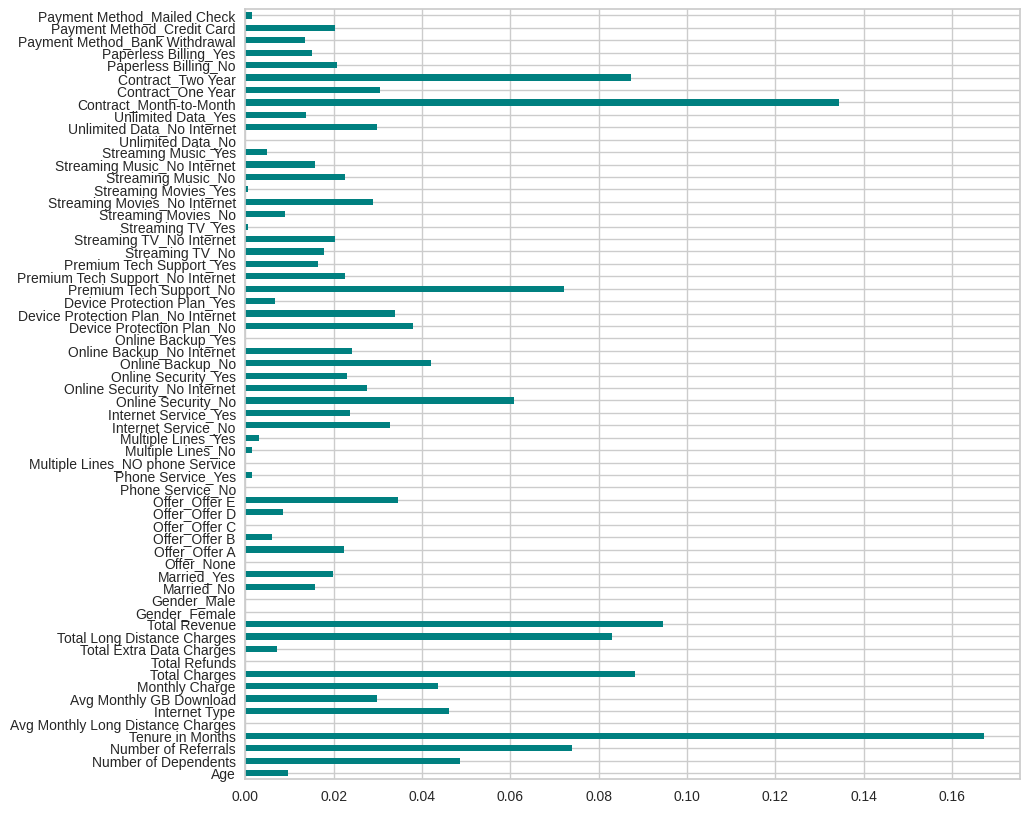

In [ ]:
from sklearn.feature_selection import mutual_info_classif
# Calculate the mutual information scores
plt.figure(1, figsize=(10, 10))
mi_scores = mutual_info_classif(X_train, y_train)
importance=pd.Series(mi_scores,X_train.columns)
importance.plot(kind='barh',color='teal')
plt.show()

In [ ]:
# create a logistic regression object
lr = LogisticRegression()

# calculate the mutual information scores
mi_scores = mutual_info_classif(X_train, y_train)

# define a range of values for k (number of features to select)
k_values = np.arange(1, len(X_train.columns) + 1)

# perform cross-validation for each value of k and calculate the mean accuracy score
scores = []
for k in k_values:
    importance = pd.Series(mi_scores, index=X_train.columns)
    top_k_features = importance.sort_values(ascending=False)[:k].index
    X_train_k = X_train[top_k_features]
    score = np.mean(cross_val_score(lr, X_train_k, y_train, cv=5))
    scores.append(score)

# select the value of k with the highest mean accuracy score
optimal_k = k_values[np.argmax(scores)]

# print the optimal k and the corresponding mean accuracy score
print(f"Optimal k: {optimal_k}, Mean accuracy score: {np.max(scores)}")

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.9/dist-packages/sklearn/lin

Optimal k: 51, Mean accuracy score: 0.8544401544401545


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
# sort the Series by the mutual information scores in descending order
importance_sorted = importance.sort_values(ascending=False)

# select the top k most important features, where k is the desired number of features
k = 45
top_k_features = importance_sorted[:k]

# print the top k most important features
print(top_k_features)


Tenure in Months                      0.161536
Contract_Month-to-Month               0.139008
Total Revenue                         0.094770
Total Charges                         0.088839
Contract_Two Year                     0.085944
Total Long Distance Charges           0.084686
Number of Referrals                   0.074588
Online Security_No                    0.066243
Premium Tech Support_No               0.056041
Number of Dependents                  0.050931
Device Protection Plan_No             0.048008
Internet Type                         0.047161
Monthly Charge                        0.044618
Streaming TV_No Internet              0.041430
Streaming Movies_No Internet          0.037502
Offer_Offer E                         0.037295
Streaming Music_No Internet           0.032156
Online Backup_No Internet             0.032006
Online Backup_No                      0.031453
Contract_One Year                     0.030721
Internet Service_Yes                  0.028397
Unlimited Dat

# Classification

## Logistic Regression

In [ ]:
#--- Baseline score for Logistic Regression ---
lgr = LogisticRegression(max_iter=1000)
lgr.fit(X_train,y_train)
y_pred = lgr.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75       368
           1       0.91      0.89      0.90       927

    accuracy                           0.86      1295
   macro avg       0.82      0.83      0.83      1295
weighted avg       0.86      0.86      0.86      1295



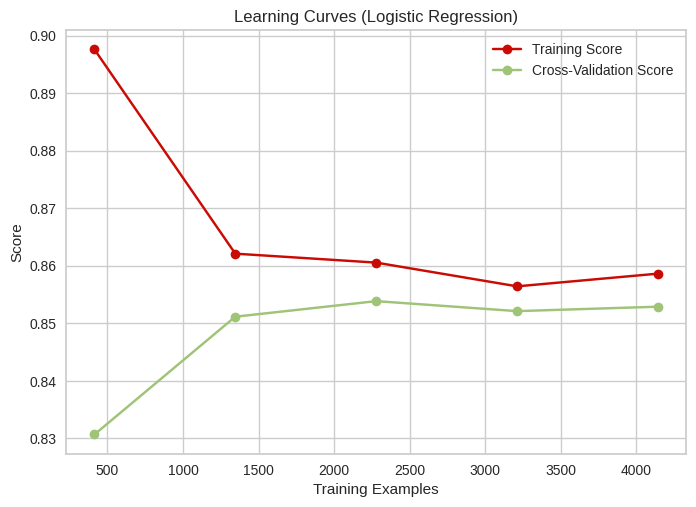

In [ ]:
# Compute the learning curve scores
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(lgr, X_train, y_train, cv=5)

# Plot the learning curve
plt.figure()
plt.title("Learning Curves (Logistic Regression)")
plt.xlabel("Training Examples")
plt.ylabel("Score")
#plt.ylim(0.6, 1.1)
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training Score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-Validation Score")
plt.legend(loc="best")
plt.show()


<Axes: xlabel='Predicted', ylabel='Real'>

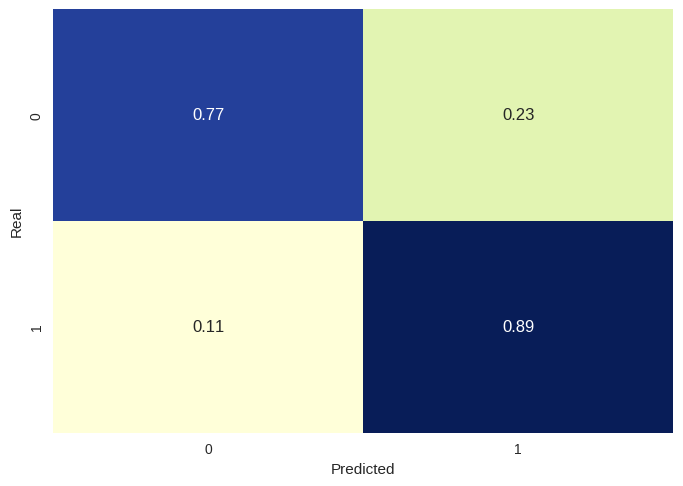

In [ ]:
conf_matrix = pd.crosstab(y_test,y_pred,rownames=['Real'],colnames=['Predicted'],normalize='index')
sns.heatmap(conf_matrix,fmt='.2f',annot=True,cmap="YlGnBu", cbar=False)

## Decision Tree Classifier

In [ ]:
clf = DecisionTreeClassifier()

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)
# Evaluate the accuracy of the classifier
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)
# Calculate the precision of the classifier
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)
# Calculate the F1 score of the classifier
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

Accuracy: 0.8162162162162162
Precision: 0.8194949470435665
F1 Score: 0.8176451260420725


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.70      0.69       368
           1       0.88      0.86      0.87       927

    accuracy                           0.82      1295
   macro avg       0.77      0.78      0.78      1295
weighted avg       0.82      0.82      0.82      1295



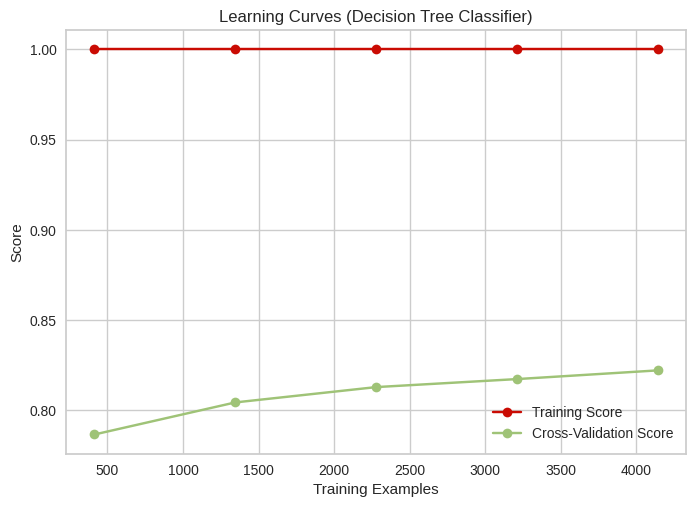

In [ ]:
# Compute the learning curve scores
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(clf , X_train, y_train, cv=5)

# Plot the learning curve
plt.figure()
plt.title("Learning Curves (Decision Tree Classifier)")
plt.xlabel("Training Examples")
plt.ylabel("Score")
#plt.ylim(0.6, 1.1)
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training Score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-Validation Score")
plt.legend(loc="best")
plt.show()


## support vector machine classifier(SVM)

In [ ]:
# Create a support vector machine classifier
clf = SVC()

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72       368
           1       0.89      0.90      0.89       927

    accuracy                           0.84      1295
   macro avg       0.81      0.80      0.81      1295
weighted avg       0.84      0.84      0.84      1295



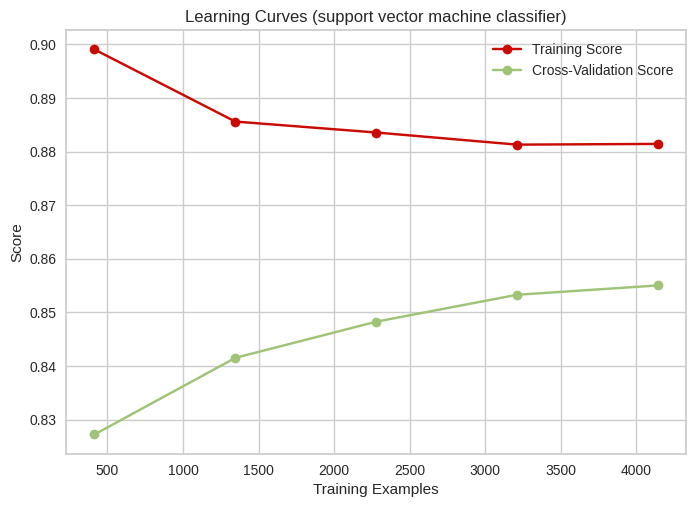

In [ ]:
# Compute the learning curve scores
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve( SVC() , X_train, y_train, cv=5)

# Plot the learning curve
plt.figure()
plt.title("Learning Curves (support vector machine classifier)")
plt.xlabel("Training Examples")
plt.ylabel("Score")
#plt.ylim(0.6, 1.1)
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training Score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-Validation Score")
plt.legend(loc="best")
plt.show()


## KNeighborsClassifier

In [ ]:
# Create a KNN classifier
clf = KNeighborsClassifier()

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.72      0.69       368
           1       0.88      0.86      0.87       927

    accuracy                           0.82      1295
   macro avg       0.78      0.79      0.78      1295
weighted avg       0.82      0.82      0.82      1295



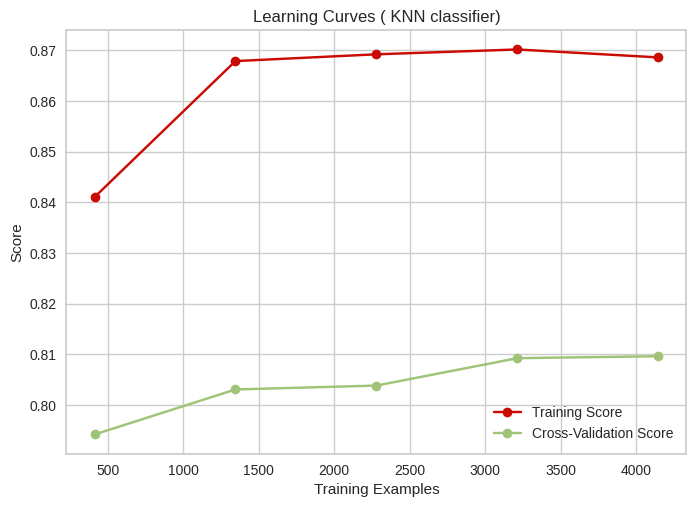

In [ ]:
# Compute the learning curve scores
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(KNeighborsClassifier() , X_train, y_train, cv=5)

# Plot the learning curve
plt.figure()
plt.title("Learning Curves ( KNN classifier)")
plt.xlabel("Training Examples")
plt.ylabel("Score")
#plt.ylim(0.6, 1.1)
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training Score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-Validation Score")
plt.legend(loc="best")
plt.show()

##  Naive Bayes classifier

In [ ]:
# Create a Naive Bayes classifier
clf = GaussianNB()

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.54      0.84      0.66       368
           1       0.92      0.72      0.80       927

    accuracy                           0.75      1295
   macro avg       0.73      0.78      0.73      1295
weighted avg       0.81      0.75      0.76      1295



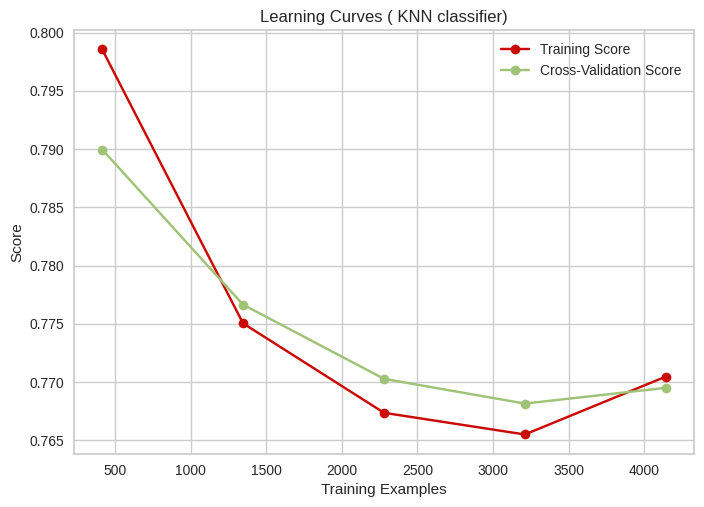

In [ ]:
# Compute the learning curve scores
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(GaussianNB() , X_train, y_train, cv=5)

# Plot the learning curve
plt.figure()
plt.title("Learning Curves ( KNN classifier)")
plt.xlabel("Training Examples")
plt.ylabel("Score")
#plt.ylim(0.6, 1.1)
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r", label="Training Score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-Validation Score")
plt.legend(loc="best")
plt.show()

# Finding Good Hyper Parameters on above models indiviually

## Decision Tree Classifier

In [ ]:
modelD= DecisionTreeClassifier()
modelD.fit(X_train, y_train)
pred_train_D = modelD.predict(X_train)
pred_test_D=modelD.predict(X_test)
acc_train_D = accuracy_score(pred_train_D, y_train)
acc_test_D = accuracy_score(pred_test_D, y_test)
print(f'Training accuracy {acc_train_D: .3f}')
print(f'Testing accuracy {acc_test_D: .3f}')


Training accuracy  1.000
Testing accuracy  0.822


In [ ]:
tuned_parameters = [{'criterion':['gini', 'entropy'],
                     'max_leaf_nodes': range(5,25)}] # hyperparameters to tune

clf_D = GridSearchCV(DecisionTreeClassifier(), tuned_parameters,
                   verbose=1, n_jobs=-1) # grid search model
clf_D.fit(X_train, y_train) # evaluate hyper-parameters

print("\nBest parameters found:")
print(clf_D.best_params_) # best hyperparameter balues

print("\nGrid scores:")
means_D = clf_D.cv_results_['mean_test_score'] # mean accuracy with folds
stds_D = clf_D.cv_results_['std_test_score'] # standard deviation of accuracies
# for each hyperparameter combination show mean +/- 2 standard-deviations
for mean, std, params in zip(means_D, stds_D, clf_D.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" %(mean, std * 2, params))

Fitting 5 folds for each of 40 candidates, totalling 200 fits

Best parameters found:
{'criterion': 'gini', 'max_leaf_nodes': 24}

Grid scores:
0.839 (+/-0.009) for {'criterion': 'gini', 'max_leaf_nodes': 5}
0.849 (+/-0.010) for {'criterion': 'gini', 'max_leaf_nodes': 6}
0.856 (+/-0.011) for {'criterion': 'gini', 'max_leaf_nodes': 7}
0.859 (+/-0.013) for {'criterion': 'gini', 'max_leaf_nodes': 8}
0.860 (+/-0.015) for {'criterion': 'gini', 'max_leaf_nodes': 9}
0.863 (+/-0.018) for {'criterion': 'gini', 'max_leaf_nodes': 10}
0.863 (+/-0.018) for {'criterion': 'gini', 'max_leaf_nodes': 11}
0.865 (+/-0.019) for {'criterion': 'gini', 'max_leaf_nodes': 12}
0.865 (+/-0.019) for {'criterion': 'gini', 'max_leaf_nodes': 13}
0.867 (+/-0.013) for {'criterion': 'gini', 'max_leaf_nodes': 14}
0.867 (+/-0.013) for {'criterion': 'gini', 'max_leaf_nodes': 15}
0.868 (+/-0.009) for {'criterion': 'gini', 'max_leaf_nodes': 16}
0.869 (+/-0.008) for {'criterion': 'gini', 'max_leaf_nodes': 17}
0.870 (+/-0.010)

Based on our 5-fold-cross-validation, we use a model with the following hyper-parameters:

criterion = 'gini'
max_leaf_nodes = 19

In [ ]:
from sklearn import  metrics
criterion = 'gini'
max_leaf_nodes = 19
# Train and test model
good_model_D = DecisionTreeClassifier(criterion=criterion,
                                    max_leaf_nodes=max_leaf_nodes) # create model
print(good_model_D) # display model parameters
good_model_D.fit(X_train, y_train) # train model
pred_D = good_model_D.predict(X_test) # predicted output for test examples
print("Results on test data")
acc_D = accuracy_score(y_test, pred_D) # accuracy on test examples
prec_D =precision_score(y_test,  pred_D) # precision on test examples
reca_D = recall_score(y_test, pred_D) # recall on test examples
print(f'Test accuracy = {acc_D: .4f}') # round to 4 decimal places
print(f'Test precision = {prec_D: .4f}') # round to 4 decimal places
print(f'Test recall = {reca_D: .4f}') # round to 4 decimal places
print("Classification report:")
print(classification_report(y_test, pred_D))
print("Confusion matrix (Rows actual, Columns predicted):")
print(pd.DataFrame(confusion_matrix(y_test, pred_D)))
ftest=[]
ftrain=[]
f11 = f1_score(y_test, pred_D )
print("F1-score:", f11)
ftest.append(f11)



DecisionTreeClassifier(max_leaf_nodes=19)
Results on test data
Test accuracy =  0.8602
Test precision =  0.8708
Test recall =  0.9450
Classification report:
              precision    recall  f1-score   support

           0       0.82      0.65      0.72       368
           1       0.87      0.94      0.91       927

    accuracy                           0.86      1295
   macro avg       0.85      0.80      0.82      1295
weighted avg       0.86      0.86      0.85      1295

Confusion matrix (Rows actual, Columns predicted):
     0    1
0  238  130
1   51  876
F1-score: 0.9063631660631143


## Logistic Regression

In [ ]:
modelL=LogisticRegression()
modelL.fit(X_train,y_train)
pred_trainL = modelL.predict(X_train)
pred_testL=modelL.predict(X_test)
acc_trainL = accuracy_score(pred_trainL, y_train)
acc_testL = accuracy_score(pred_testL, y_test)
print(f'Training accuracy {acc_trainL: .3f}')
print(f'Testing accuracy {acc_testL: .3f}')

Training accuracy  0.858
Testing accuracy  0.857


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
tuned_parameters = [{'C': [10.0, 100.0, 1000.0, 10000.0],
                     'max_iter': [500, 1000]}] # hyperparameters to tune


clfL = GridSearchCV(LogisticRegression(), tuned_parameters,
                   verbose=1, n_jobs=-1) # grid search model
clfL.fit(X_train,y_train) # evaluate hyper-parameters

print("\nBest parameters found:")
print(clfL.best_params_) # best hyperparameter values

print("\nGrid scores:")
meansL = clfL.cv_results_['mean_test_score'] # mean accuracy with folds
stdsL = clfL.cv_results_['std_test_score'] # standard deviation of accuracies
# for each hyperparameter combination show mean +/- 2 standard-deviations
for mean, std, params in zip(meansL, stdsL, clfL.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" %(mean, std * 2, params))

Fitting 5 folds for each of 8 candidates, totalling 40 fits

Best parameters found:
{'C': 100.0, 'max_iter': 500}

Grid scores:
0.853 (+/-0.018) for {'C': 10.0, 'max_iter': 500}
0.853 (+/-0.018) for {'C': 10.0, 'max_iter': 1000}
0.853 (+/-0.019) for {'C': 100.0, 'max_iter': 500}
0.853 (+/-0.019) for {'C': 100.0, 'max_iter': 1000}
0.853 (+/-0.019) for {'C': 1000.0, 'max_iter': 500}
0.853 (+/-0.019) for {'C': 1000.0, 'max_iter': 1000}
0.853 (+/-0.019) for {'C': 10000.0, 'max_iter': 500}
0.853 (+/-0.019) for {'C': 10000.0, 'max_iter': 1000}


In [ ]:
# Specify non-default hyper-parameter values
C = 100
max_iter = 500
# Train and test model
good_modelL = LogisticRegression(C = C, max_iter=max_iter) # create model
print(good_modelL) # display model parameters
good_modelL.fit(X_train,y_train) # train model
predL = good_modelL.predict(X_test) # predicted output for test examples
print("Results on test data")
accL = accuracy_score(y_test, predL) # accuracy on test examples
precL = precision_score(y_test, predL) # precision on test examples
recaL = recall_score(y_test, predL) # recall on test examples
print(f'Test accuracy = {accL: .4f}') # round to 4 decimal places
print(f'Test precision = {precL: .4f}') # round to 4 decimal places
print(f'Test recall = {recaL: .4f}') # round to 4 decimal places
print("Classification report:")
print(classification_report(y_test, predL))
print("Confusion matrix (Rows actual, Columns predicted):")
print(pd.DataFrame(confusion_matrix(y_test, predL)))
f12 = f1_score(y_test, predL )
print("F1-score:", f12)
ftest.append(f12)


LogisticRegression(C=100, max_iter=500)
Results on test data
Test accuracy =  0.8595
Test precision =  0.9098
Test recall =  0.8921
Classification report:
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       368
           1       0.91      0.89      0.90       927

    accuracy                           0.86      1295
   macro avg       0.83      0.83      0.83      1295
weighted avg       0.86      0.86      0.86      1295

Confusion matrix (Rows actual, Columns predicted):
     0    1
0  286   82
1  100  827
F1-score: 0.900871459694989


## KNN MODEL

In [ ]:
modelknn= KNeighborsClassifier().fit(X_train,y_train)
pred_trainknn = modelknn.predict(X_train)
pred_testknn=modelknn.predict(X_test)
acc_trainknn = accuracy_score(pred_trainknn, y_train)
acc_testknn = accuracy_score(pred_testknn, y_test)
print(f'Training accuracy {acc_trainknn: .3f}')
print(f'Testing accuracy {acc_testknn: .3f}')

Training accuracy  0.869
Testing accuracy  0.818


In [ ]:
tuned_parameters = [{'algorithm':['brute'],
                     'metric': ['euclidean', 'minkowski'],
                    'n_neighbors': [5, 10, 20]}] # hyperparameters to tune

clfknn = GridSearchCV(KNeighborsClassifier(), tuned_parameters,
                   verbose=1, n_jobs=-1) # grid search model
clfknn.fit(X_train, y_train) # evaluate hyper-parameters

print("\nBest parameters found:")
print(clfknn.best_params_) # best hyperparameter balues

print("\nGrid scores:")
meansknn = clfknn.cv_results_['mean_test_score'] # mean accuracy with folds
stdsknn = clfknn.cv_results_['std_test_score'] # standard deviation of accuracies
# for each hyperparameter combination show mean +/- 2 standard-deviations
for mean, std, params in zip(meansknn, stdsknn, clfknn.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" %(mean, std * 2, params))

Fitting 5 folds for each of 6 candidates, totalling 30 fits

Best parameters found:
{'algorithm': 'brute', 'metric': 'euclidean', 'n_neighbors': 20}

Grid scores:
0.810 (+/-0.015) for {'algorithm': 'brute', 'metric': 'euclidean', 'n_neighbors': 5}
0.809 (+/-0.035) for {'algorithm': 'brute', 'metric': 'euclidean', 'n_neighbors': 10}
0.817 (+/-0.026) for {'algorithm': 'brute', 'metric': 'euclidean', 'n_neighbors': 20}
0.810 (+/-0.015) for {'algorithm': 'brute', 'metric': 'minkowski', 'n_neighbors': 5}
0.809 (+/-0.035) for {'algorithm': 'brute', 'metric': 'minkowski', 'n_neighbors': 10}
0.817 (+/-0.026) for {'algorithm': 'brute', 'metric': 'minkowski', 'n_neighbors': 20}


In [ ]:
# Specify non-default hyper-parameter values
algorithm = 'brute'
metric = 'euclidean'
n_neighbors =  20
# Train and test model
good_modelknn = KNeighborsClassifier(algorithm=algorithm, metric=metric,
                                  n_neighbors=n_neighbors) # create model
print(good_modelknn) # display model parameters
good_modelknn.fit(X_train, y_train) # train model
predknn = good_modelknn.predict(X_test) # predicted output for test examples
print("Results on test data")
accknn = accuracy_score(y_test, predknn) # accuracy on test examples
precknn = precision_score(y_test, predknn) # precision on test examples
recaknn = recall_score(y_test, predknn) # recall on test examples
print(f'Test accuracy = {accknn: .4f}') # round to 4 decimal places
print(f'Test precision = {precknn: .4f}') # round to 4 decimal places
print(f'Test recall = {recaknn: .4f}') # round to 4 decimal places
print("Classification report:")
print(classification_report(y_test, predknn))
print("Confusion matrix (Rows actual, Columns predicted):")
print(pd.DataFrame(confusion_matrix(y_test, predknn)))
f13 = f1_score(y_test, predknn )
print("F1-score:", f13)
ftest.append(f13)



KNeighborsClassifier(algorithm='brute', metric='euclidean', n_neighbors=20)
Results on test data
Test accuracy =  0.8077
Test precision =  0.8861
Test recall =  0.8393
Classification report:
              precision    recall  f1-score   support

           0       0.64      0.73      0.68       368
           1       0.89      0.84      0.86       927

    accuracy                           0.81      1295
   macro avg       0.76      0.78      0.77      1295
weighted avg       0.82      0.81      0.81      1295

Confusion matrix (Rows actual, Columns predicted):
     0    1
0  268  100
1  149  778
F1-score: 0.8620498614958448


## Super Vector Machines(SVM)

In [ ]:
modelsvm=svm.SVC().fit(X_train,y_train)
pred_trainsvm = modelsvm.predict(X_train)
pred_testsvm=modelsvm.predict(X_test)
acc_trainsvm = accuracy_score(pred_trainsvm, y_train)
acc_testsvm = accuracy_score(pred_testsvm, y_test)
print(f'Training accuracy {acc_trainsvm: .3f}')
print(f'Testing accuracy {acc_testsvm: .3f}')

Training accuracy  0.881
Testing accuracy  0.844


In [ ]:
tuned_parameters = [{'kernel':['linear'], 'gamma':[1], 'C':[1]}]
                     # hyperparameters to tune

clfsvm = GridSearchCV(svm.SVC(), tuned_parameters,
                   verbose=1, n_jobs=-1) # grid search model
clfsvm.fit(X_train,y_train) # evaluate hyper-parameters

print("\nBest parameters found:")
print(clfsvm.best_params_) # best hyperparameter balues

print("\nGrid scores:")
meansvm = clfsvm.cv_results_['mean_test_score'] # mean accuracy with folds
stdsvm = clfsvm.cv_results_['std_test_score'] # standard deviation of accuracies
# for each hyperparameter combination show mean +/- 2 standard-deviations
for mean, std, params in zip(meansvm, stdsvm, clfsvm.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" %(mean, std * 2, params))

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Best parameters found:
{'C': 1, 'gamma': 1, 'kernel': 'linear'}

Grid scores:
0.855 (+/-0.018) for {'C': 1, 'gamma': 1, 'kernel': 'linear'}


In [ ]:
# Specify non-default hyper-parameter values
C = 1 # algorithm name
kernel = 'linear'# kernel type
gamma =  0.1 # kernel parameter
# Train and test model
good_modelsvm = svm.SVC(C=C, kernel=kernel,
                                  gamma=gamma) # create model
print(good_modelsvm) # display model parameters
good_modelsvm.fit(X_train,y_train) # train model
predsvm = good_modelsvm.predict(X_test) # predicted output for test examples
print("Results on test data")
accsvm = accuracy_score(y_test, predsvm) # accuracy on test examples
precsvm = precision_score(y_test, predsvm) # precision on test examples
recasvm = recall_score(y_test, predsvm) # recall on test examples
print(f'Test accuracy = {accsvm: .4f}') # round to 4 decimal places
print(f'Test precision = {precsvm: .4f}') # round to 4 decimal places
print(f'Test recall = {recasvm: .4f}') # round to 4 decimal places
print("Classification report:")
print(classification_report(y_test, predsvm))
print("Confusion matrix (Rows actual, Columns predicted):")
print(pd.DataFrame(confusion_matrix(y_test, predsvm)))
f14 = f1_score(y_test,predsvm  )
print("F1-score:", f14)
ftest.append(f14)

SVC(C=1, gamma=0.1, kernel='linear')
Results on test data
Test accuracy =  0.8571
Test precision =  0.9041
Test recall =  0.8954
Classification report:
              precision    recall  f1-score   support

           0       0.74      0.76      0.75       368
           1       0.90      0.90      0.90       927

    accuracy                           0.86      1295
   macro avg       0.82      0.83      0.83      1295
weighted avg       0.86      0.86      0.86      1295

Confusion matrix (Rows actual, Columns predicted):
     0    1
0  280   88
1   97  830
F1-score: 0.8997289972899728


##  Naive Bayes classifier

In [ ]:
# Create a Naive Bayes classifier
clf = GaussianNB()

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.54      0.84      0.66       368
           1       0.92      0.72      0.80       927

    accuracy                           0.75      1295
   macro avg       0.73      0.78      0.73      1295
weighted avg       0.81      0.75      0.76      1295



In [ ]:
tuned_parameters = [{'var_smoothing': [1e-9, 1e-8, 1e-7]}]
                     # hyperparameters to tune

clfsvm = GridSearchCV(clf, tuned_parameters,
                   cv=5) # grid search model
clfsvm.fit(X_train,y_train) # evaluate hyper-parameters

print("\nBest parameters found:")
print(clfsvm.best_params_) # best hyperparameter balues

print("\nGrid scores:")
meansvm = clfsvm.cv_results_['mean_test_score'] # mean accuracy with folds
stdsvm = clfsvm.cv_results_['std_test_score'] # standard deviation of accuracies
# for each hyperparameter combination show mean +/- 2 standard-deviations
for mean, std, params in zip(meansvm, stdsvm, clfsvm.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" %(mean, std * 2, params))


Best parameters found:
{'var_smoothing': 1e-09}

Grid scores:
0.769 (+/-0.025) for {'var_smoothing': 1e-09}
0.769 (+/-0.025) for {'var_smoothing': 1e-08}
0.769 (+/-0.025) for {'var_smoothing': 1e-07}


In [ ]:
# Specify non-default hyper-parameter values
var_smoothing= 1e-09
# Train and test model
good_clf = GaussianNB(var_smoothing= 1e-09)# create model
print(good_clf) # display model parameters
good_clf.fit(X_train,y_train) # train model
predsvm = good_clf.predict(X_test) # predicted output for test examples
print("Results on test data")
accsvm = accuracy_score(y_test, predsvm) # accuracy on test examples
precsvm = precision_score(y_test, predsvm) # precision on test examples
recasvm = recall_score(y_test, predsvm) # recall on test examples
print(f'Test accuracy = {accsvm: .4f}') # round to 4 decimal places
print(f'Test precision = {precsvm: .4f}') # round to 4 decimal places
print(f'Test recall = {recasvm: .4f}') # round to 4 decimal places
print("Classification report:")
print(classification_report(y_test, predsvm))
print("Confusion matrix (Rows actual, Columns predicted):")
print(pd.DataFrame(confusion_matrix(y_test, predsvm)))
f15 = f1_score(y_test,predsvm  )
print("F1-score:", f15)
ftest.append(f15)

GaussianNB()
Results on test data
Test accuracy =  0.7506
Test precision =  0.9183
Test recall =  0.7152
Classification report:
              precision    recall  f1-score   support

           0       0.54      0.84      0.66       368
           1       0.92      0.72      0.80       927

    accuracy                           0.75      1295
   macro avg       0.73      0.78      0.73      1295
weighted avg       0.81      0.75      0.76      1295

Confusion matrix (Rows actual, Columns predicted):
     0    1
0  309   59
1  264  663
F1-score: 0.8041237113402062


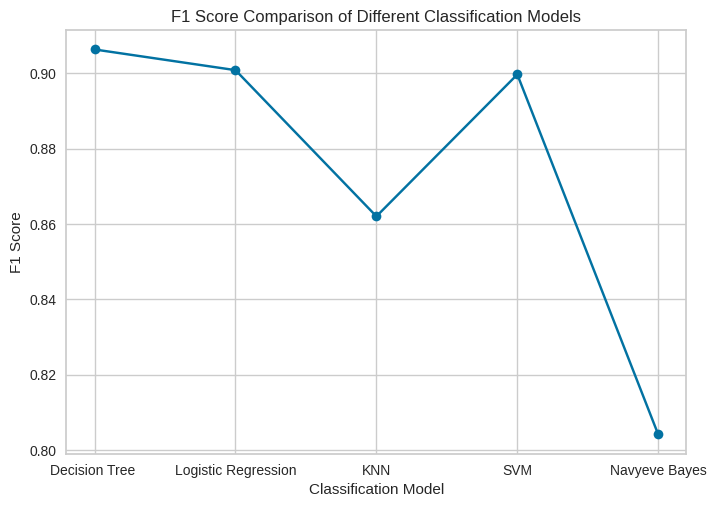

In [ ]:
labels = ['Decision Tree ','Logistic Regression', 'KNN', 'SVM','Navyeve Bayes']
# Plot the F1 scores
plt.plot(labels, ftest, 'bo-')
plt.xlabel('Classification Model')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison of Different Classification Models')
plt.show()


# Clustering

## PCA

In [ ]:
#Initiating PCA to reduce dimentions aka features to 3
X_train = X_train.select_dtypes(include='number')
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X_train)
PCA_ds = pd.DataFrame(pca.transform(X_train), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

count          mean       std       min       25%       50%       75%  \
col1  5180.0  2.194727e-16  2.224681 -4.414406 -1.495363 -0.212660  1.688782   
col2  5180.0  4.389453e-17  1.882970 -3.656181 -1.623984 -0.295562  1.464324   
col3  5180.0 -5.486816e-17  1.308406 -3.104147 -0.968066 -0.160378  0.833540   

           max  
col1  5.677739  
col2  5.375462  
col3  6.084812

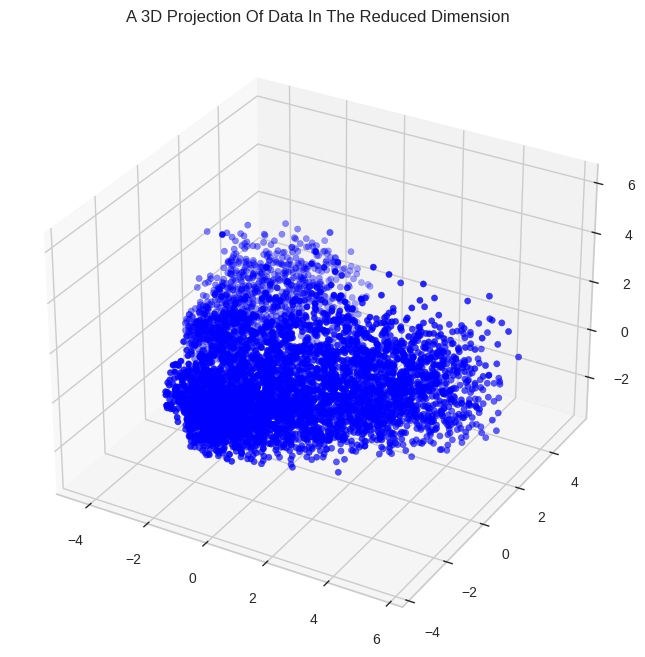

In [ ]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="blue", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

## K-means

Elbow Method to determine the number of clusters to be formed:


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change fro

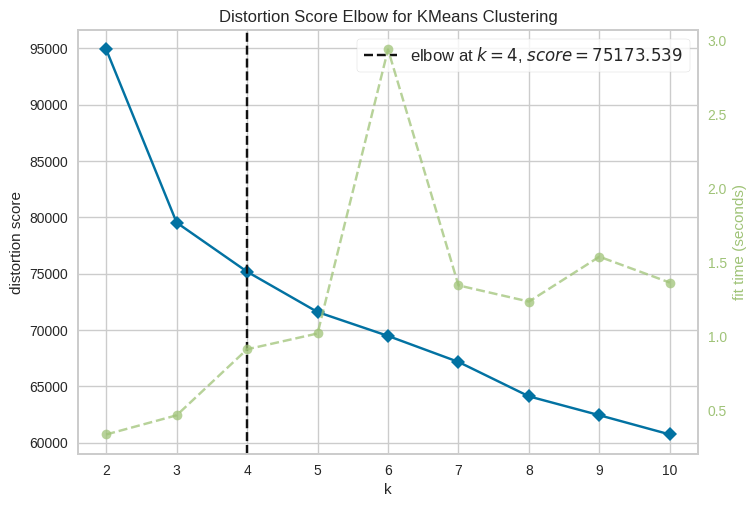

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(X_train)
Elbow_M.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change fro

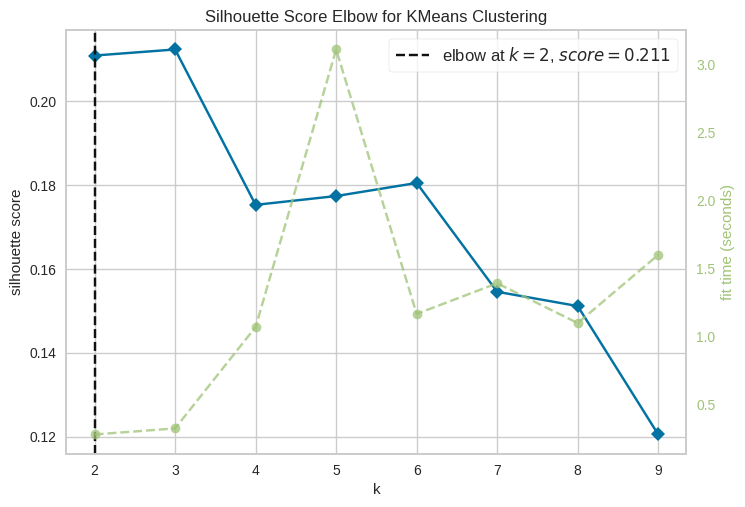

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(X_train)
visualizer.show()
plt.show()

The above cells indicates that four will be an optimal number of clusters for this data. Next, we will be fitting the Agglomerative Clustering Model to get the final clusters.

In [ ]:
#Initiating the  Clustering model
AC = KMeans(n_clusters=3)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
X_train["Clusters"]= yhat_AC
# extract the labels from y target variable
labels_true = y_train
# calculate the RI score
ri_score = adjusted_rand_score(labels_true, yhat_AC)

# print the RI score
print("RI score: ", ri_score)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



RI score:  0.026936153928640034


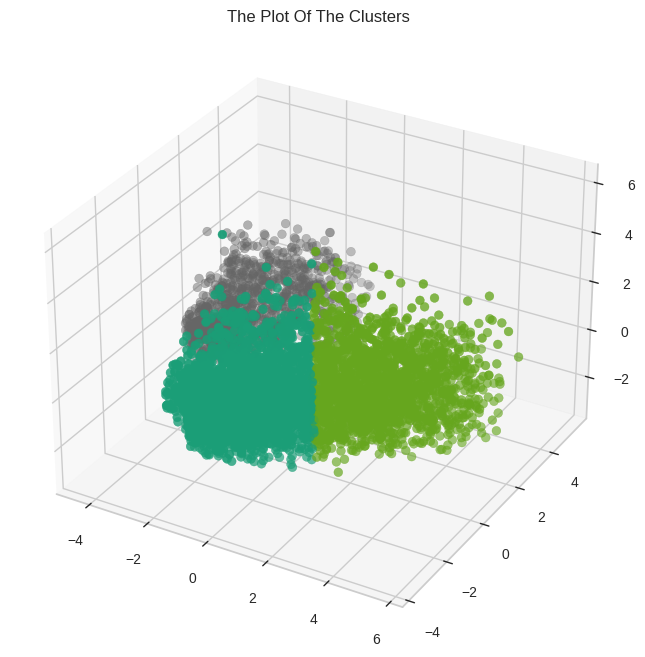

In [ ]:
from matplotlib.colors import ListedColormap

#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = 'Dark2' )
ax.set_title("The Plot Of The Clusters")
plt.show()

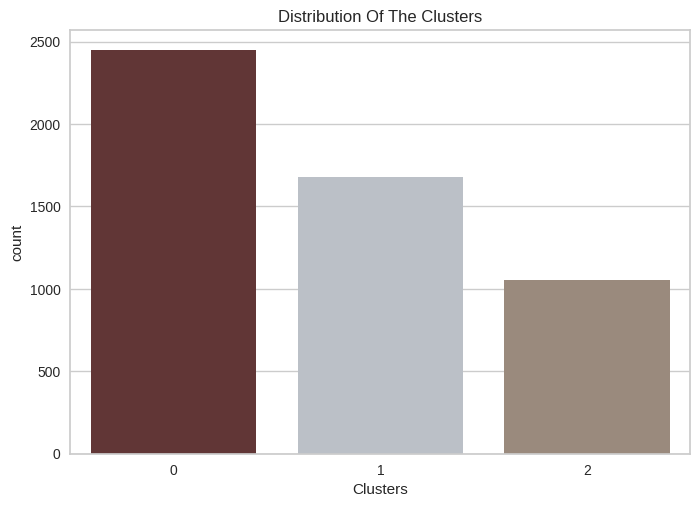

In [ ]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=X_train["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

<ipython-input-719-6946960e44d0>:1: UserWarning:

The palette list has more values (4) than needed (3), which may not be intended.



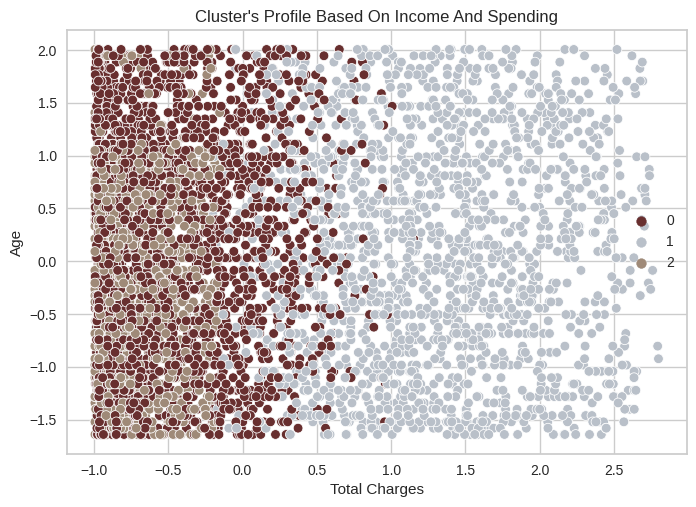

In [ ]:
pl = sns.scatterplot(data = X_train,x=X_train['Total Charges'], y=X_train['Age'],hue=X_train["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

## DBSCAN

In [ ]:
# perform DBSCAN clustering on the PCA variables
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(PCA_ds)

# print the cluster labels
print(labels)

[0 0 0 ... 1 0 0]


In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score
# calculate the RI score
true_labels = y_train # the ground truth labels from your dataset
ri_score = adjusted_rand_score(true_labels, labels)

# print the RI score
print("RI score: ", ri_score)

RI score:  0.02378722064757404



##  hiérarchique AgglomerativeClustering(n_clusters=3)


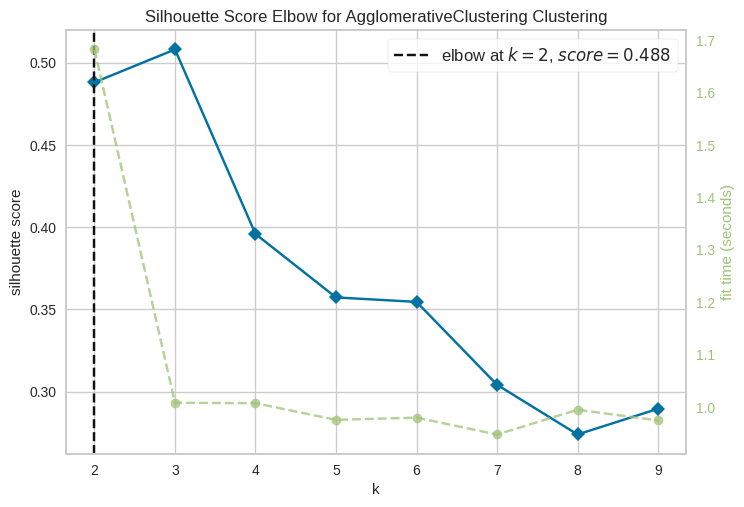

<Axes: title={'center': 'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
# instantiate the agglomerative clustering model
agg = AgglomerativeClustering()

# use the KElbowVisualizer to determine the optimal number of clusters
viz = KElbowVisualizer(agg, k=(2,10), metric='silhouette')
viz.fit(PCA_ds)
viz.show()

In [ ]:
# instantiate the agglomerative clustering model
agg = AgglomerativeClustering(n_clusters=2)

# fit the model to the data
agg.fit(PCA_ds)

# print the cluster labels for each data point
print(agg.labels_)


[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score
# calculate the RI score
true_labels = y_train # the ground truth labels from your dataset
ri_score = adjusted_rand_score(true_labels, agg.labels_)

# print the RI score
print("RI score: ", ri_score)

RI score:  -0.06080299458439681


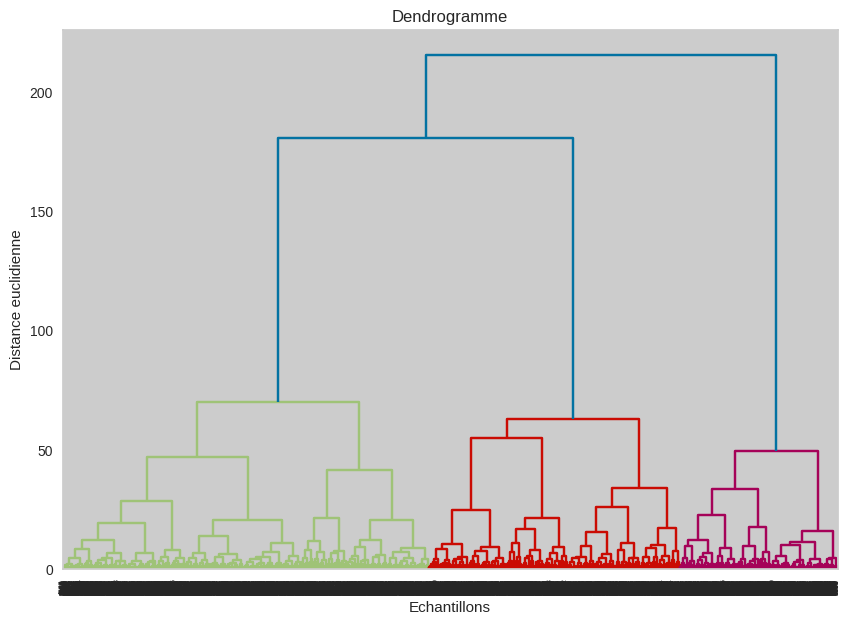

In [ ]:
# Importation des bibliothèques nécessaires

from scipy.cluster.hierarchy import dendrogram, linkage


# Effectuer la clustering hiérarchique
linked = linkage(PCA_ds, 'ward')

# Visualiser le dendrogramme
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrogramme")
plt.xlabel("Echantillons")
plt.ylabel("Distance euclidienne")
plt.show()



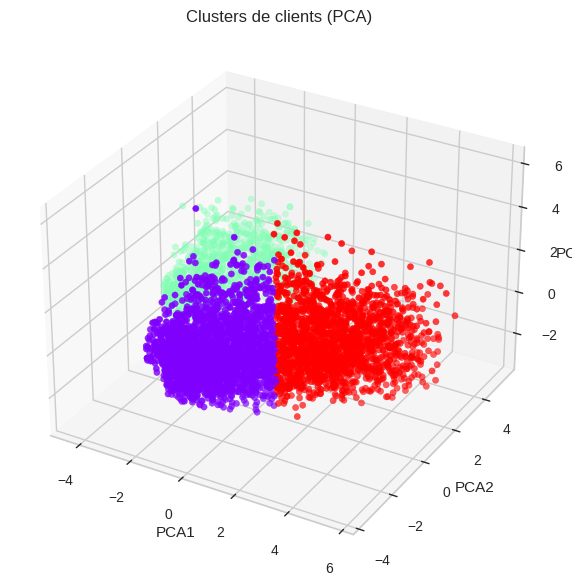

In [ ]:

# Visualiser les clusters
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(PCA_ds.iloc[:, 0], PCA_ds.iloc[:, 1], PCA_ds.iloc[:, 2], c=agg.labels_, cmap='rainbow')
ax.set_title("Clusters de clients (PCA)")
ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")
plt.show()